In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# データの準備

 - [Binance Data - BTC/USD\[Minute\]](https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_minute.csv)

In [3]:
dataset = pd.read_csv('data/Binance_BTCUSDT_minute.csv', skiprows=1, index_col=1, parse_dates=True).sort_index()

feature_df = pd.DataFrame({
    '収益率': dataset['close'].pct_change(),
    'BTCの取引量': dataset['Volume BTC'],
    'USDTの取引量': dataset['Volume USDT'],
    '取引回数': dataset['tradecount'],
    '差分': dataset['open'] - dataset['close']
})

teacher_ser = dataset['close'].pct_change().shift(-1)
teacher_ser = teacher_ser.rename('teacher')

In [4]:
merged = pd.merge(teacher_ser, feature_df, left_index=True, right_index=True, how='inner').dropna()
teacher_ser = merged.pop('teacher')
feature_df = merged

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, teacher_ser, test_size=0.3, shuffle=False)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# モデルの構築

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, GRU, Dense


特徴量の数 = X_train.shape[1]

# About GRU
系列長の長さ = 60
出力の次元数 = 5

estimator = Sequential([
    InputLayer(batch_input_shape=(None, 系列長の長さ, 特徴量の数), name='input_layer'),
    GRU(units=出力の次元数, activation='linear', use_bias=False, name='internal_layer'),
    Dense(1, activation="linear", name="output_layer")
], name='GRU')

In [14]:
estimator.summary()

Model: "GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
internal_layer (GRU)         (None, 5)                 150       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


# 学習プロセスの設定

In [15]:
最適化アルゴリズム = 'adam'
損失関数 = 'mse'
評価関数_list  = ['mse']

estimator.compile(
    optimizer=最適化アルゴリズム,
    loss=損失関数,
    metrics=評価関数_list
)

# 学習

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


バッチサイズ = 100
エポック数 = 5000
# コールバックs = []
コールバックs = [EarlyStopping(monitor='val_loss', patience=10)]  # 最低10エポックはパラメーターを更新する

generator = TimeseriesGenerator(X_train, y_train, length=系列長の長さ, batch_size=バッチサイズ)
X, y = generator[0]

history = estimator.fit(
    X, y, 
    validation_split=0.3,
    batch_size=バッチサイズ,
    epochs=エポック数,
    callbacks=コールバックs
)

Epoch 1/5000
1/1 [==============================] - 0s 289ms/step - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2432 - val_mse: 0.2432
Epoch 2/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.2428 - mse: 0.2428 - val_loss: 0.2374 - val_mse: 0.2374
Epoch 3/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.2369 - mse: 0.2369 - val_loss: 0.2316 - val_mse: 0.2316
Epoch 4/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 0.2260 - val_mse: 0.2260
Epoch 5/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.2255 - mse: 0.2255 - val_loss: 0.2204 - val_mse: 0.2204
Epoch 6/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.2200 - mse: 0.2200 - val_loss: 0.2150 - val_mse: 0.2150
Epoch 7/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.2145 - mse: 0.2145 - val_loss: 0.2096 - val_mse: 0.2096
Epoch 8/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.2091 - 

1/1 [==============================] - 0s 57ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 64/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 65/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 66/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 67/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 68/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 69/5000
1/1 [==============================] - 0s 92ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 70/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0332 - mse: 0.

Epoch 125/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 126/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 127/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 128/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 129/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 130/5000
1/1 [==============================] - 0s 85ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 131/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 132/5000
1/1 [==============================] - 0s 152ms/step -

Epoch 183/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.6453e-04 - mse: 1.6453e-04 - val_loss: 1.7499e-04 - val_mse: 1.7499e-04
Epoch 184/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.5577e-04 - mse: 1.5577e-04 - val_loss: 1.6543e-04 - val_mse: 1.6543e-04
Epoch 185/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.4753e-04 - mse: 1.4753e-04 - val_loss: 1.5640e-04 - val_mse: 1.5640e-04
Epoch 186/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.3980e-04 - mse: 1.3980e-04 - val_loss: 1.4788e-04 - val_mse: 1.4788e-04
Epoch 187/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.3254e-04 - mse: 1.3254e-04 - val_loss: 1.3985e-04 - val_mse: 1.3985e-04
Epoch 188/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2573e-04 - mse: 1.2573e-04 - val_loss: 1.3227e-04 - val_mse: 1.3227e-04
Epoch 189/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.1935e-04 - mse: 1.1935e-04 - 

Epoch 238/5000
1/1 [==============================] - 0s 42ms/step - loss: 3.3026e-05 - mse: 3.3026e-05 - val_loss: 1.6720e-05 - val_mse: 1.6720e-05
Epoch 239/5000
1/1 [==============================] - 0s 31ms/step - loss: 3.2871e-05 - mse: 3.2871e-05 - val_loss: 1.6382e-05 - val_mse: 1.6382e-05
Epoch 240/5000
1/1 [==============================] - 0s 33ms/step - loss: 3.2728e-05 - mse: 3.2728e-05 - val_loss: 1.6063e-05 - val_mse: 1.6063e-05
Epoch 241/5000
1/1 [==============================] - 0s 45ms/step - loss: 3.2596e-05 - mse: 3.2596e-05 - val_loss: 1.5762e-05 - val_mse: 1.5762e-05
Epoch 242/5000
1/1 [==============================] - 0s 100ms/step - loss: 3.2475e-05 - mse: 3.2475e-05 - val_loss: 1.5478e-05 - val_mse: 1.5478e-05
Epoch 243/5000
1/1 [==============================] - 0s 36ms/step - loss: 3.2363e-05 - mse: 3.2363e-05 - val_loss: 1.5211e-05 - val_mse: 1.5211e-05
Epoch 244/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.2259e-05 - mse: 3.2259e-05 -

Epoch 293/5000
1/1 [==============================] - 0s 41ms/step - loss: 3.0676e-05 - mse: 3.0676e-05 - val_loss: 1.0777e-05 - val_mse: 1.0777e-05
Epoch 294/5000
1/1 [==============================] - 0s 33ms/step - loss: 3.0660e-05 - mse: 3.0660e-05 - val_loss: 1.0758e-05 - val_mse: 1.0758e-05
Epoch 295/5000
1/1 [==============================] - 0s 105ms/step - loss: 3.0644e-05 - mse: 3.0644e-05 - val_loss: 1.0739e-05 - val_mse: 1.0739e-05
Epoch 296/5000
1/1 [==============================] - 0s 52ms/step - loss: 3.0629e-05 - mse: 3.0629e-05 - val_loss: 1.0721e-05 - val_mse: 1.0721e-05
Epoch 297/5000
1/1 [==============================] - 0s 132ms/step - loss: 3.0613e-05 - mse: 3.0613e-05 - val_loss: 1.0703e-05 - val_mse: 1.0703e-05
Epoch 298/5000
1/1 [==============================] - 0s 97ms/step - loss: 3.0598e-05 - mse: 3.0598e-05 - val_loss: 1.0686e-05 - val_mse: 1.0686e-05
Epoch 299/5000
1/1 [==============================] - 0s 74ms/step - loss: 3.0582e-05 - mse: 3.0582e-05 

Epoch 348/5000
1/1 [==============================] - 0s 58ms/step - loss: 2.9808e-05 - mse: 2.9808e-05 - val_loss: 1.0201e-05 - val_mse: 1.0201e-05
Epoch 349/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.9792e-05 - mse: 2.9792e-05 - val_loss: 1.0193e-05 - val_mse: 1.0193e-05
Epoch 350/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.9776e-05 - mse: 2.9776e-05 - val_loss: 1.0186e-05 - val_mse: 1.0186e-05
Epoch 351/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.9760e-05 - mse: 2.9760e-05 - val_loss: 1.0178e-05 - val_mse: 1.0178e-05
Epoch 352/5000
1/1 [==============================] - 0s 69ms/step - loss: 2.9744e-05 - mse: 2.9744e-05 - val_loss: 1.0171e-05 - val_mse: 1.0171e-05
Epoch 353/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.9728e-05 - mse: 2.9728e-05 - val_loss: 1.0163e-05 - val_mse: 1.0163e-05
Epoch 354/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.9711e-05 - mse: 2.9711e-05 - 

1/1 [==============================] - 0s 87ms/step - loss: 2.8945e-05 - mse: 2.8945e-05 - val_loss: 9.7895e-06 - val_mse: 9.7895e-06
Epoch 402/5000
1/1 [==============================] - 0s 80ms/step - loss: 2.8928e-05 - mse: 2.8928e-05 - val_loss: 9.7815e-06 - val_mse: 9.7815e-06
Epoch 403/5000
1/1 [==============================] - 0s 82ms/step - loss: 2.8912e-05 - mse: 2.8912e-05 - val_loss: 9.7735e-06 - val_mse: 9.7735e-06
Epoch 404/5000
1/1 [==============================] - 0s 51ms/step - loss: 2.8895e-05 - mse: 2.8895e-05 - val_loss: 9.7656e-06 - val_mse: 9.7656e-06
Epoch 405/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.8879e-05 - mse: 2.8879e-05 - val_loss: 9.7575e-06 - val_mse: 9.7575e-06
Epoch 406/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.8862e-05 - mse: 2.8862e-05 - val_loss: 9.7495e-06 - val_mse: 9.7495e-06
Epoch 407/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.8846e-05 - mse: 2.8846e-05 - val_loss: 9.741

Epoch 456/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.8028e-05 - mse: 2.8028e-05 - val_loss: 9.3490e-06 - val_mse: 9.3490e-06
Epoch 457/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.8011e-05 - mse: 2.8011e-05 - val_loss: 9.3410e-06 - val_mse: 9.3410e-06
Epoch 458/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.7994e-05 - mse: 2.7994e-05 - val_loss: 9.3330e-06 - val_mse: 9.3330e-06
Epoch 459/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.7977e-05 - mse: 2.7977e-05 - val_loss: 9.3250e-06 - val_mse: 9.3250e-06
Epoch 460/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.7960e-05 - mse: 2.7960e-05 - val_loss: 9.3171e-06 - val_mse: 9.3171e-06
Epoch 461/5000
1/1 [==============================] - 0s 51ms/step - loss: 2.7943e-05 - mse: 2.7943e-05 - val_loss: 9.3091e-06 - val_mse: 9.3091e-06
Epoch 462/5000
1/1 [==============================] - 0s 165ms/step - loss: 2.7927e-05 - mse: 2.7927e-05 -

Epoch 511/5000
1/1 [==============================] - 0s 84ms/step - loss: 2.7096e-05 - mse: 2.7096e-05 - val_loss: 8.9100e-06 - val_mse: 8.9100e-06
Epoch 512/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.7079e-05 - mse: 2.7079e-05 - val_loss: 8.9020e-06 - val_mse: 8.9020e-06
Epoch 513/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.7062e-05 - mse: 2.7062e-05 - val_loss: 8.8941e-06 - val_mse: 8.8941e-06
Epoch 514/5000
1/1 [==============================] - 0s 55ms/step - loss: 2.7045e-05 - mse: 2.7045e-05 - val_loss: 8.8862e-06 - val_mse: 8.8862e-06
Epoch 515/5000
1/1 [==============================] - 0s 58ms/step - loss: 2.7028e-05 - mse: 2.7028e-05 - val_loss: 8.8782e-06 - val_mse: 8.8782e-06
Epoch 516/5000
1/1 [==============================] - 0s 89ms/step - loss: 2.7011e-05 - mse: 2.7011e-05 - val_loss: 8.8702e-06 - val_mse: 8.8702e-06
Epoch 517/5000
1/1 [==============================] - 0s 70ms/step - loss: 2.6993e-05 - mse: 2.6993e-05 - 

Epoch 566/5000
1/1 [==============================] - 0s 71ms/step - loss: 2.6155e-05 - mse: 2.6155e-05 - val_loss: 8.4757e-06 - val_mse: 8.4757e-06
Epoch 567/5000
1/1 [==============================] - 0s 71ms/step - loss: 2.6138e-05 - mse: 2.6138e-05 - val_loss: 8.4678e-06 - val_mse: 8.4678e-06
Epoch 568/5000
1/1 [==============================] - 0s 57ms/step - loss: 2.6121e-05 - mse: 2.6121e-05 - val_loss: 8.4600e-06 - val_mse: 8.4600e-06
Epoch 569/5000
1/1 [==============================] - 0s 73ms/step - loss: 2.6104e-05 - mse: 2.6104e-05 - val_loss: 8.4522e-06 - val_mse: 8.4522e-06
Epoch 570/5000
1/1 [==============================] - 0s 52ms/step - loss: 2.6086e-05 - mse: 2.6086e-05 - val_loss: 8.4444e-06 - val_mse: 8.4444e-06
Epoch 571/5000
1/1 [==============================] - 0s 62ms/step - loss: 2.6069e-05 - mse: 2.6069e-05 - val_loss: 8.4366e-06 - val_mse: 8.4366e-06
Epoch 572/5000
1/1 [==============================] - 0s 67ms/step - loss: 2.6052e-05 - mse: 2.6052e-05 - 

Epoch 621/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.5210e-05 - mse: 2.5210e-05 - val_loss: 8.0490e-06 - val_mse: 8.0490e-06
Epoch 622/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.5193e-05 - mse: 2.5193e-05 - val_loss: 8.0413e-06 - val_mse: 8.0413e-06
Epoch 623/5000
1/1 [==============================] - 0s 74ms/step - loss: 2.5176e-05 - mse: 2.5176e-05 - val_loss: 8.0336e-06 - val_mse: 8.0336e-06
Epoch 624/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.5159e-05 - mse: 2.5159e-05 - val_loss: 8.0259e-06 - val_mse: 8.0259e-06
Epoch 625/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.5142e-05 - mse: 2.5142e-05 - val_loss: 8.0182e-06 - val_mse: 8.0182e-06
Epoch 626/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.5124e-05 - mse: 2.5124e-05 - val_loss: 8.0106e-06 - val_mse: 8.0106e-06
Epoch 627/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.5107e-05 - mse: 2.5107e-05 - 

Epoch 676/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.4266e-05 - mse: 2.4266e-05 - val_loss: 7.6298e-06 - val_mse: 7.6298e-06
Epoch 677/5000
1/1 [==============================] - 0s 44ms/step - loss: 2.4249e-05 - mse: 2.4249e-05 - val_loss: 7.6222e-06 - val_mse: 7.6222e-06
Epoch 678/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.4232e-05 - mse: 2.4232e-05 - val_loss: 7.6147e-06 - val_mse: 7.6147e-06
Epoch 679/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.4215e-05 - mse: 2.4215e-05 - val_loss: 7.6072e-06 - val_mse: 7.6072e-06
Epoch 680/5000
1/1 [==============================] - 0s 45ms/step - loss: 2.4197e-05 - mse: 2.4197e-05 - val_loss: 7.5996e-06 - val_mse: 7.5996e-06
Epoch 681/5000
1/1 [==============================] - 0s 56ms/step - loss: 2.4180e-05 - mse: 2.4180e-05 - val_loss: 7.5921e-06 - val_mse: 7.5921e-06
Epoch 682/5000
1/1 [==============================] - 0s 61ms/step - loss: 2.4163e-05 - mse: 2.4163e-05 - 

Epoch 731/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.3326e-05 - mse: 2.3326e-05 - val_loss: 7.2209e-06 - val_mse: 7.2209e-06
Epoch 732/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.3309e-05 - mse: 2.3309e-05 - val_loss: 7.2136e-06 - val_mse: 7.2136e-06
Epoch 733/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.3292e-05 - mse: 2.3292e-05 - val_loss: 7.2063e-06 - val_mse: 7.2063e-06
Epoch 734/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.3275e-05 - mse: 2.3275e-05 - val_loss: 7.1990e-06 - val_mse: 7.1990e-06
Epoch 735/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.3258e-05 - mse: 2.3258e-05 - val_loss: 7.1916e-06 - val_mse: 7.1916e-06
Epoch 736/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.3241e-05 - mse: 2.3241e-05 - val_loss: 7.1843e-06 - val_mse: 7.1843e-06
Epoch 737/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.3223e-05 - mse: 2.3223e-05 - 

Epoch 786/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.2392e-05 - mse: 2.2392e-05 - val_loss: 6.8237e-06 - val_mse: 6.8237e-06
Epoch 787/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.2376e-05 - mse: 2.2376e-05 - val_loss: 6.8165e-06 - val_mse: 6.8165e-06
Epoch 788/5000
1/1 [==============================] - 0s 67ms/step - loss: 2.2359e-05 - mse: 2.2359e-05 - val_loss: 6.8095e-06 - val_mse: 6.8095e-06
Epoch 789/5000
1/1 [==============================] - 0s 50ms/step - loss: 2.2342e-05 - mse: 2.2342e-05 - val_loss: 6.8024e-06 - val_mse: 6.8024e-06
Epoch 790/5000
1/1 [==============================] - 0s 67ms/step - loss: 2.2325e-05 - mse: 2.2325e-05 - val_loss: 6.7953e-06 - val_mse: 6.7953e-06
Epoch 791/5000
1/1 [==============================] - 0s 57ms/step - loss: 2.2308e-05 - mse: 2.2308e-05 - val_loss: 6.7882e-06 - val_mse: 6.7882e-06
Epoch 792/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.2291e-05 - mse: 2.2291e-05 - 

Epoch 841/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.1469e-05 - mse: 2.1469e-05 - val_loss: 6.4380e-06 - val_mse: 6.4380e-06
Epoch 842/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.1452e-05 - mse: 2.1452e-05 - val_loss: 6.4311e-06 - val_mse: 6.4311e-06
Epoch 843/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.1435e-05 - mse: 2.1435e-05 - val_loss: 6.4243e-06 - val_mse: 6.4243e-06
Epoch 844/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.1419e-05 - mse: 2.1419e-05 - val_loss: 6.4173e-06 - val_mse: 6.4173e-06
Epoch 845/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.1402e-05 - mse: 2.1402e-05 - val_loss: 6.4105e-06 - val_mse: 6.4105e-06
Epoch 846/5000
1/1 [==============================] - 0s 49ms/step - loss: 2.1385e-05 - mse: 2.1385e-05 - val_loss: 6.4035e-06 - val_mse: 6.4035e-06
Epoch 847/5000
1/1 [==============================] - 0s 94ms/step - loss: 2.1369e-05 - mse: 2.1369e-05 - 

Epoch 896/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.0557e-05 - mse: 2.0557e-05 - val_loss: 6.0652e-06 - val_mse: 6.0652e-06
Epoch 897/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.0540e-05 - mse: 2.0540e-05 - val_loss: 6.0585e-06 - val_mse: 6.0585e-06
Epoch 898/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.0524e-05 - mse: 2.0524e-05 - val_loss: 6.0518e-06 - val_mse: 6.0518e-06
Epoch 899/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.0507e-05 - mse: 2.0507e-05 - val_loss: 6.0452e-06 - val_mse: 6.0452e-06
Epoch 900/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.0491e-05 - mse: 2.0491e-05 - val_loss: 6.0386e-06 - val_mse: 6.0386e-06
Epoch 901/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.0475e-05 - mse: 2.0475e-05 - val_loss: 6.0319e-06 - val_mse: 6.0319e-06
Epoch 902/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.0458e-05 - mse: 2.0458e-05 - 

Epoch 951/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.9659e-05 - mse: 1.9659e-05 - val_loss: 5.7048e-06 - val_mse: 5.7048e-06
Epoch 952/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.9642e-05 - mse: 1.9642e-05 - val_loss: 5.6983e-06 - val_mse: 5.6983e-06
Epoch 953/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.9626e-05 - mse: 1.9626e-05 - val_loss: 5.6919e-06 - val_mse: 5.6919e-06
Epoch 954/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.9610e-05 - mse: 1.9610e-05 - val_loss: 5.6855e-06 - val_mse: 5.6855e-06
Epoch 955/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.9594e-05 - mse: 1.9594e-05 - val_loss: 5.6790e-06 - val_mse: 5.6790e-06
Epoch 956/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.9578e-05 - mse: 1.9578e-05 - val_loss: 5.6727e-06 - val_mse: 5.6727e-06
Epoch 957/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.9562e-05 - mse: 1.9562e-05 - 

Epoch 1006/5000
1/1 [==============================] - 0s 83ms/step - loss: 1.8776e-05 - mse: 1.8776e-05 - val_loss: 5.3590e-06 - val_mse: 5.3590e-06
Epoch 1007/5000
1/1 [==============================] - 0s 83ms/step - loss: 1.8760e-05 - mse: 1.8760e-05 - val_loss: 5.3528e-06 - val_mse: 5.3528e-06
Epoch 1008/5000
1/1 [==============================] - 0s 62ms/step - loss: 1.8744e-05 - mse: 1.8744e-05 - val_loss: 5.3466e-06 - val_mse: 5.3466e-06
Epoch 1009/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.8728e-05 - mse: 1.8728e-05 - val_loss: 5.3405e-06 - val_mse: 5.3405e-06
Epoch 1010/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.8712e-05 - mse: 1.8712e-05 - val_loss: 5.3343e-06 - val_mse: 5.3343e-06
Epoch 1011/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.8696e-05 - mse: 1.8696e-05 - val_loss: 5.3282e-06 - val_mse: 5.3282e-06
Epoch 1012/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.8680e-05 - mse: 1.8680

1/1 [==============================] - 0s 35ms/step - loss: 1.7925e-05 - mse: 1.7925e-05 - val_loss: 5.0319e-06 - val_mse: 5.0319e-06
Epoch 1061/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.7909e-05 - mse: 1.7909e-05 - val_loss: 5.0261e-06 - val_mse: 5.0261e-06
Epoch 1062/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.7894e-05 - mse: 1.7894e-05 - val_loss: 5.0202e-06 - val_mse: 5.0202e-06
Epoch 1063/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.7878e-05 - mse: 1.7878e-05 - val_loss: 5.0143e-06 - val_mse: 5.0143e-06
Epoch 1064/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.7862e-05 - mse: 1.7862e-05 - val_loss: 5.0084e-06 - val_mse: 5.0084e-06
Epoch 1065/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.7847e-05 - mse: 1.7847e-05 - val_loss: 5.0025e-06 - val_mse: 5.0025e-06
Epoch 1066/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.7831e-05 - mse: 1.7831e-05 - val_loss:

Epoch 1115/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.7076e-05 - mse: 1.7076e-05 - val_loss: 4.7117e-06 - val_mse: 4.7117e-06
Epoch 1116/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.7061e-05 - mse: 1.7061e-05 - val_loss: 4.7060e-06 - val_mse: 4.7060e-06
Epoch 1117/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.7045e-05 - mse: 1.7045e-05 - val_loss: 4.7004e-06 - val_mse: 4.7004e-06
Epoch 1118/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.7030e-05 - mse: 1.7030e-05 - val_loss: 4.6947e-06 - val_mse: 4.6947e-06
Epoch 1119/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.7015e-05 - mse: 1.7015e-05 - val_loss: 4.6890e-06 - val_mse: 4.6890e-06
Epoch 1120/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.7000e-05 - mse: 1.7000e-05 - val_loss: 4.6833e-06 - val_mse: 4.6833e-06
Epoch 1121/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.6984e-05 - mse: 1.6984

1/1 [==============================] - 0s 68ms/step - loss: 1.6261e-05 - mse: 1.6261e-05 - val_loss: 4.4104e-06 - val_mse: 4.4104e-06
Epoch 1170/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.6246e-05 - mse: 1.6246e-05 - val_loss: 4.4050e-06 - val_mse: 4.4050e-06
Epoch 1171/5000
1/1 [==============================] - 0s 70ms/step - loss: 1.6231e-05 - mse: 1.6231e-05 - val_loss: 4.3995e-06 - val_mse: 4.3995e-06
Epoch 1172/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.6216e-05 - mse: 1.6216e-05 - val_loss: 4.3940e-06 - val_mse: 4.3940e-06
Epoch 1173/5000
1/1 [==============================] - 0s 68ms/step - loss: 1.6201e-05 - mse: 1.6201e-05 - val_loss: 4.3885e-06 - val_mse: 4.3885e-06
Epoch 1174/5000
1/1 [==============================] - 0s 79ms/step - loss: 1.6186e-05 - mse: 1.6186e-05 - val_loss: 4.3830e-06 - val_mse: 4.3830e-06
Epoch 1175/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.6172e-05 - mse: 1.6172e-05 - val_loss:

Epoch 1224/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.5451e-05 - mse: 1.5451e-05 - val_loss: 4.1168e-06 - val_mse: 4.1168e-06
Epoch 1225/5000
1/1 [==============================] - 0s 100ms/step - loss: 1.5436e-05 - mse: 1.5436e-05 - val_loss: 4.1116e-06 - val_mse: 4.1116e-06
Epoch 1226/5000
1/1 [==============================] - 0s 72ms/step - loss: 1.5421e-05 - mse: 1.5421e-05 - val_loss: 4.1064e-06 - val_mse: 4.1064e-06
Epoch 1227/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.5407e-05 - mse: 1.5407e-05 - val_loss: 4.1011e-06 - val_mse: 4.1011e-06
Epoch 1228/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.5392e-05 - mse: 1.5392e-05 - val_loss: 4.0959e-06 - val_mse: 4.0959e-06
Epoch 1229/5000
1/1 [==============================] - 0s 32ms/step - loss: 1.5378e-05 - mse: 1.5378e-05 - val_loss: 4.0908e-06 - val_mse: 4.0908e-06
Epoch 1230/5000
1/1 [==============================] - 0s 64ms/step - loss: 1.5363e-05 - mse: 1.536

1/1 [==============================] - 0s 35ms/step - loss: 1.4675e-05 - mse: 1.4675e-05 - val_loss: 3.8410e-06 - val_mse: 3.8410e-06
Epoch 1279/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.4661e-05 - mse: 1.4661e-05 - val_loss: 3.8360e-06 - val_mse: 3.8360e-06
Epoch 1280/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.4647e-05 - mse: 1.4647e-05 - val_loss: 3.8310e-06 - val_mse: 3.8310e-06
Epoch 1281/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.4633e-05 - mse: 1.4633e-05 - val_loss: 3.8260e-06 - val_mse: 3.8260e-06
Epoch 1282/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.4618e-05 - mse: 1.4618e-05 - val_loss: 3.8211e-06 - val_mse: 3.8211e-06
Epoch 1283/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.4604e-05 - mse: 1.4604e-05 - val_loss: 3.8161e-06 - val_mse: 3.8161e-06
Epoch 1284/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.4590e-05 - mse: 1.4590e-05 - val_loss:

Epoch 1333/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.3907e-05 - mse: 1.3907e-05 - val_loss: 3.5734e-06 - val_mse: 3.5734e-06
Epoch 1334/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.3893e-05 - mse: 1.3893e-05 - val_loss: 3.5687e-06 - val_mse: 3.5687e-06
Epoch 1335/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.3879e-05 - mse: 1.3879e-05 - val_loss: 3.5639e-06 - val_mse: 3.5639e-06
Epoch 1336/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.3866e-05 - mse: 1.3866e-05 - val_loss: 3.5592e-06 - val_mse: 3.5592e-06
Epoch 1337/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.3852e-05 - mse: 1.3852e-05 - val_loss: 3.5545e-06 - val_mse: 3.5545e-06
Epoch 1338/5000
1/1 [==============================] - 0s 32ms/step - loss: 1.3838e-05 - mse: 1.3838e-05 - val_loss: 3.5498e-06 - val_mse: 3.5498e-06
Epoch 1339/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.3824e-05 - mse: 1.3824

1/1 [==============================] - 0s 51ms/step - loss: 1.3174e-05 - mse: 1.3174e-05 - val_loss: 3.3234e-06 - val_mse: 3.3234e-06
Epoch 1388/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.3161e-05 - mse: 1.3161e-05 - val_loss: 3.3189e-06 - val_mse: 3.3189e-06
Epoch 1389/5000
1/1 [==============================] - 0s 66ms/step - loss: 1.3148e-05 - mse: 1.3148e-05 - val_loss: 3.3144e-06 - val_mse: 3.3144e-06
Epoch 1390/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.3134e-05 - mse: 1.3134e-05 - val_loss: 3.3099e-06 - val_mse: 3.3099e-06
Epoch 1391/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.3121e-05 - mse: 1.3121e-05 - val_loss: 3.3054e-06 - val_mse: 3.3054e-06
Epoch 1392/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.3108e-05 - mse: 1.3108e-05 - val_loss: 3.3009e-06 - val_mse: 3.3009e-06
Epoch 1393/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.3094e-05 - mse: 1.3094e-05 - val_loss:

Epoch 1442/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.2452e-05 - mse: 1.2452e-05 - val_loss: 3.0819e-06 - val_mse: 3.0819e-06
Epoch 1443/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.2439e-05 - mse: 1.2439e-05 - val_loss: 3.0775e-06 - val_mse: 3.0775e-06
Epoch 1444/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2426e-05 - mse: 1.2426e-05 - val_loss: 3.0733e-06 - val_mse: 3.0733e-06
Epoch 1445/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2413e-05 - mse: 1.2413e-05 - val_loss: 3.0690e-06 - val_mse: 3.0690e-06
Epoch 1446/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.2400e-05 - mse: 1.2400e-05 - val_loss: 3.0647e-06 - val_mse: 3.0647e-06
Epoch 1447/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.2387e-05 - mse: 1.2387e-05 - val_loss: 3.0605e-06 - val_mse: 3.0605e-06
Epoch 1448/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.2374e-05 - mse: 1.2374

1/1 [==============================] - 0s 35ms/step - loss: 1.1765e-05 - mse: 1.1765e-05 - val_loss: 2.8567e-06 - val_mse: 2.8567e-06
Epoch 1497/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.1753e-05 - mse: 1.1753e-05 - val_loss: 2.8526e-06 - val_mse: 2.8526e-06
Epoch 1498/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.1740e-05 - mse: 1.1740e-05 - val_loss: 2.8485e-06 - val_mse: 2.8485e-06
Epoch 1499/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.1728e-05 - mse: 1.1728e-05 - val_loss: 2.8445e-06 - val_mse: 2.8445e-06
Epoch 1500/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.1715e-05 - mse: 1.1715e-05 - val_loss: 2.8404e-06 - val_mse: 2.8404e-06
Epoch 1501/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1703e-05 - mse: 1.1703e-05 - val_loss: 2.8364e-06 - val_mse: 2.8364e-06
Epoch 1502/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.1690e-05 - mse: 1.1690e-05 - val_loss:

Epoch 1551/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.1091e-05 - mse: 1.1091e-05 - val_loss: 2.6406e-06 - val_mse: 2.6406e-06
Epoch 1552/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.1079e-05 - mse: 1.1079e-05 - val_loss: 2.6368e-06 - val_mse: 2.6368e-06
Epoch 1553/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.1067e-05 - mse: 1.1067e-05 - val_loss: 2.6331e-06 - val_mse: 2.6331e-06
Epoch 1554/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.1055e-05 - mse: 1.1055e-05 - val_loss: 2.6293e-06 - val_mse: 2.6293e-06
Epoch 1555/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.1043e-05 - mse: 1.1043e-05 - val_loss: 2.6255e-06 - val_mse: 2.6255e-06
Epoch 1556/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1031e-05 - mse: 1.1031e-05 - val_loss: 2.6217e-06 - val_mse: 2.6217e-06
Epoch 1557/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.1019e-05 - mse: 1.1019

1/1 [==============================] - 0s 36ms/step - loss: 1.0453e-05 - mse: 1.0453e-05 - val_loss: 2.4406e-06 - val_mse: 2.4406e-06
Epoch 1606/5000
1/1 [==============================] - 0s 96ms/step - loss: 1.0441e-05 - mse: 1.0441e-05 - val_loss: 2.4370e-06 - val_mse: 2.4370e-06
Epoch 1607/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.0430e-05 - mse: 1.0430e-05 - val_loss: 2.4334e-06 - val_mse: 2.4334e-06
Epoch 1608/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.0418e-05 - mse: 1.0418e-05 - val_loss: 2.4298e-06 - val_mse: 2.4298e-06
Epoch 1609/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.0407e-05 - mse: 1.0407e-05 - val_loss: 2.4263e-06 - val_mse: 2.4263e-06
Epoch 1610/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.0395e-05 - mse: 1.0395e-05 - val_loss: 2.4227e-06 - val_mse: 2.4227e-06
Epoch 1611/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.0384e-05 - mse: 1.0384e-05 - val_loss:

Epoch 1660/5000
1/1 [==============================] - 0s 50ms/step - loss: 9.8288e-06 - mse: 9.8288e-06 - val_loss: 2.2491e-06 - val_mse: 2.2491e-06
Epoch 1661/5000
1/1 [==============================] - 0s 38ms/step - loss: 9.8177e-06 - mse: 9.8177e-06 - val_loss: 2.2458e-06 - val_mse: 2.2458e-06
Epoch 1662/5000
1/1 [==============================] - 0s 43ms/step - loss: 9.8066e-06 - mse: 9.8066e-06 - val_loss: 2.2424e-06 - val_mse: 2.2424e-06
Epoch 1663/5000
1/1 [==============================] - 0s 64ms/step - loss: 9.7955e-06 - mse: 9.7955e-06 - val_loss: 2.2391e-06 - val_mse: 2.2391e-06
Epoch 1664/5000
1/1 [==============================] - 0s 47ms/step - loss: 9.7844e-06 - mse: 9.7844e-06 - val_loss: 2.2357e-06 - val_mse: 2.2357e-06
Epoch 1665/5000
1/1 [==============================] - 0s 40ms/step - loss: 9.7734e-06 - mse: 9.7734e-06 - val_loss: 2.2324e-06 - val_mse: 2.2324e-06
Epoch 1666/5000
1/1 [==============================] - 0s 89ms/step - loss: 9.7623e-06 - mse: 9.7623

1/1 [==============================] - 0s 128ms/step - loss: 9.2415e-06 - mse: 9.2415e-06 - val_loss: 2.0726e-06 - val_mse: 2.0726e-06
Epoch 1715/5000
1/1 [==============================] - 0s 74ms/step - loss: 9.2308e-06 - mse: 9.2308e-06 - val_loss: 2.0694e-06 - val_mse: 2.0694e-06
Epoch 1716/5000
1/1 [==============================] - 0s 80ms/step - loss: 9.2202e-06 - mse: 9.2202e-06 - val_loss: 2.0663e-06 - val_mse: 2.0663e-06
Epoch 1717/5000
1/1 [==============================] - 0s 60ms/step - loss: 9.2096e-06 - mse: 9.2096e-06 - val_loss: 2.0631e-06 - val_mse: 2.0631e-06
Epoch 1718/5000
1/1 [==============================] - 0s 66ms/step - loss: 9.1990e-06 - mse: 9.1990e-06 - val_loss: 2.0599e-06 - val_mse: 2.0599e-06
Epoch 1719/5000
1/1 [==============================] - 0s 68ms/step - loss: 9.1884e-06 - mse: 9.1884e-06 - val_loss: 2.0568e-06 - val_mse: 2.0568e-06
Epoch 1720/5000
1/1 [==============================] - 0s 63ms/step - loss: 9.1778e-06 - mse: 9.1778e-06 - val_loss

Epoch 1769/5000
1/1 [==============================] - 0s 65ms/step - loss: 8.6694e-06 - mse: 8.6694e-06 - val_loss: 1.9044e-06 - val_mse: 1.9044e-06
Epoch 1770/5000
1/1 [==============================] - 0s 49ms/step - loss: 8.6592e-06 - mse: 8.6592e-06 - val_loss: 1.9015e-06 - val_mse: 1.9015e-06
Epoch 1771/5000
1/1 [==============================] - 0s 131ms/step - loss: 8.6491e-06 - mse: 8.6491e-06 - val_loss: 1.8985e-06 - val_mse: 1.8985e-06
Epoch 1772/5000
1/1 [==============================] - 0s 57ms/step - loss: 8.6389e-06 - mse: 8.6389e-06 - val_loss: 1.8956e-06 - val_mse: 1.8956e-06
Epoch 1773/5000
1/1 [==============================] - 0s 116ms/step - loss: 8.6288e-06 - mse: 8.6288e-06 - val_loss: 1.8926e-06 - val_mse: 1.8926e-06
Epoch 1774/5000
1/1 [==============================] - 0s 54ms/step - loss: 8.6187e-06 - mse: 8.6187e-06 - val_loss: 1.8897e-06 - val_mse: 1.8897e-06
Epoch 1775/5000
1/1 [==============================] - 0s 89ms/step - loss: 8.6086e-06 - mse: 8.60

1/1 [==============================] - 0s 43ms/step - loss: 8.1334e-06 - mse: 8.1334e-06 - val_loss: 1.7499e-06 - val_mse: 1.7499e-06
Epoch 1824/5000
1/1 [==============================] - 0s 87ms/step - loss: 8.1237e-06 - mse: 8.1237e-06 - val_loss: 1.7472e-06 - val_mse: 1.7472e-06
Epoch 1825/5000
1/1 [==============================] - 0s 78ms/step - loss: 8.1141e-06 - mse: 8.1141e-06 - val_loss: 1.7444e-06 - val_mse: 1.7444e-06
Epoch 1826/5000
1/1 [==============================] - 0s 34ms/step - loss: 8.1044e-06 - mse: 8.1044e-06 - val_loss: 1.7417e-06 - val_mse: 1.7417e-06
Epoch 1827/5000
1/1 [==============================] - 0s 34ms/step - loss: 8.0948e-06 - mse: 8.0948e-06 - val_loss: 1.7389e-06 - val_mse: 1.7389e-06
Epoch 1828/5000
1/1 [==============================] - 0s 38ms/step - loss: 8.0851e-06 - mse: 8.0851e-06 - val_loss: 1.7362e-06 - val_mse: 1.7362e-06
Epoch 1829/5000
1/1 [==============================] - 0s 33ms/step - loss: 8.0755e-06 - mse: 8.0755e-06 - val_loss:

Epoch 1878/5000
1/1 [==============================] - 0s 58ms/step - loss: 7.6138e-06 - mse: 7.6138e-06 - val_loss: 1.6030e-06 - val_mse: 1.6030e-06
Epoch 1879/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.6046e-06 - mse: 7.6046e-06 - val_loss: 1.6005e-06 - val_mse: 1.6005e-06
Epoch 1880/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.5954e-06 - mse: 7.5954e-06 - val_loss: 1.5979e-06 - val_mse: 1.5979e-06
Epoch 1881/5000
1/1 [==============================] - 0s 92ms/step - loss: 7.5862e-06 - mse: 7.5862e-06 - val_loss: 1.5953e-06 - val_mse: 1.5953e-06
Epoch 1882/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.5770e-06 - mse: 7.5770e-06 - val_loss: 1.5928e-06 - val_mse: 1.5928e-06
Epoch 1883/5000
1/1 [==============================] - 0s 55ms/step - loss: 7.5679e-06 - mse: 7.5679e-06 - val_loss: 1.5902e-06 - val_mse: 1.5902e-06
Epoch 1884/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.5587e-06 - mse: 7.5587

1/1 [==============================] - 0s 51ms/step - loss: 7.1293e-06 - mse: 7.1293e-06 - val_loss: 1.4687e-06 - val_mse: 1.4687e-06
Epoch 1933/5000
1/1 [==============================] - 0s 74ms/step - loss: 7.1206e-06 - mse: 7.1206e-06 - val_loss: 1.4663e-06 - val_mse: 1.4663e-06
Epoch 1934/5000
1/1 [==============================] - 0s 50ms/step - loss: 7.1119e-06 - mse: 7.1119e-06 - val_loss: 1.4640e-06 - val_mse: 1.4640e-06
Epoch 1935/5000
1/1 [==============================] - 0s 82ms/step - loss: 7.1032e-06 - mse: 7.1032e-06 - val_loss: 1.4616e-06 - val_mse: 1.4616e-06
Epoch 1936/5000
1/1 [==============================] - 0s 80ms/step - loss: 7.0945e-06 - mse: 7.0945e-06 - val_loss: 1.4592e-06 - val_mse: 1.4592e-06
Epoch 1937/5000
1/1 [==============================] - 0s 55ms/step - loss: 7.0857e-06 - mse: 7.0857e-06 - val_loss: 1.4568e-06 - val_mse: 1.4568e-06
Epoch 1938/5000
1/1 [==============================] - 0s 44ms/step - loss: 7.0771e-06 - mse: 7.0771e-06 - val_loss:

Epoch 1987/5000
1/1 [==============================] - 0s 34ms/step - loss: 6.6619e-06 - mse: 6.6619e-06 - val_loss: 1.3415e-06 - val_mse: 1.3415e-06
Epoch 1988/5000
1/1 [==============================] - 0s 34ms/step - loss: 6.6536e-06 - mse: 6.6536e-06 - val_loss: 1.3393e-06 - val_mse: 1.3393e-06
Epoch 1989/5000
1/1 [==============================] - 0s 33ms/step - loss: 6.6454e-06 - mse: 6.6454e-06 - val_loss: 1.3371e-06 - val_mse: 1.3371e-06
Epoch 1990/5000
1/1 [==============================] - 0s 37ms/step - loss: 6.6371e-06 - mse: 6.6371e-06 - val_loss: 1.3348e-06 - val_mse: 1.3348e-06
Epoch 1991/5000
1/1 [==============================] - 0s 48ms/step - loss: 6.6289e-06 - mse: 6.6289e-06 - val_loss: 1.3326e-06 - val_mse: 1.3326e-06
Epoch 1992/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.6207e-06 - mse: 6.6207e-06 - val_loss: 1.3304e-06 - val_mse: 1.3304e-06
Epoch 1993/5000
1/1 [==============================] - 0s 34ms/step - loss: 6.6125e-06 - mse: 6.6125

1/1 [==============================] - 0s 34ms/step - loss: 6.2282e-06 - mse: 6.2282e-06 - val_loss: 1.2255e-06 - val_mse: 1.2255e-06
Epoch 2042/5000
1/1 [==============================] - 0s 35ms/step - loss: 6.2204e-06 - mse: 6.2204e-06 - val_loss: 1.2234e-06 - val_mse: 1.2234e-06
Epoch 2043/5000
1/1 [==============================] - 0s 55ms/step - loss: 6.2126e-06 - mse: 6.2126e-06 - val_loss: 1.2214e-06 - val_mse: 1.2214e-06
Epoch 2044/5000
1/1 [==============================] - 0s 60ms/step - loss: 6.2048e-06 - mse: 6.2048e-06 - val_loss: 1.2193e-06 - val_mse: 1.2193e-06
Epoch 2045/5000
1/1 [==============================] - 0s 84ms/step - loss: 6.1970e-06 - mse: 6.1970e-06 - val_loss: 1.2172e-06 - val_mse: 1.2172e-06
Epoch 2046/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.1893e-06 - mse: 6.1893e-06 - val_loss: 1.2152e-06 - val_mse: 1.2152e-06
Epoch 2047/5000
1/1 [==============================] - 0s 48ms/step - loss: 6.1815e-06 - mse: 6.1815e-06 - val_loss:

Epoch 2096/5000
1/1 [==============================] - 0s 115ms/step - loss: 5.8118e-06 - mse: 5.8118e-06 - val_loss: 1.1161e-06 - val_mse: 1.1161e-06
Epoch 2097/5000
1/1 [==============================] - 0s 79ms/step - loss: 5.8044e-06 - mse: 5.8044e-06 - val_loss: 1.1142e-06 - val_mse: 1.1142e-06
Epoch 2098/5000
1/1 [==============================] - 0s 51ms/step - loss: 5.7971e-06 - mse: 5.7971e-06 - val_loss: 1.1123e-06 - val_mse: 1.1123e-06
Epoch 2099/5000
1/1 [==============================] - 0s 44ms/step - loss: 5.7898e-06 - mse: 5.7898e-06 - val_loss: 1.1103e-06 - val_mse: 1.1103e-06
Epoch 2100/5000
1/1 [==============================] - 0s 37ms/step - loss: 5.7824e-06 - mse: 5.7824e-06 - val_loss: 1.1084e-06 - val_mse: 1.1084e-06
Epoch 2101/5000
1/1 [==============================] - 0s 36ms/step - loss: 5.7751e-06 - mse: 5.7751e-06 - val_loss: 1.1066e-06 - val_mse: 1.1066e-06
Epoch 2102/5000
1/1 [==============================] - 0s 40ms/step - loss: 5.7679e-06 - mse: 5.767

1/1 [==============================] - 0s 50ms/step - loss: 5.4273e-06 - mse: 5.4273e-06 - val_loss: 1.0170e-06 - val_mse: 1.0170e-06
Epoch 2151/5000
1/1 [==============================] - 0s 57ms/step - loss: 5.4204e-06 - mse: 5.4204e-06 - val_loss: 1.0152e-06 - val_mse: 1.0152e-06
Epoch 2152/5000
1/1 [==============================] - 0s 46ms/step - loss: 5.4135e-06 - mse: 5.4135e-06 - val_loss: 1.0135e-06 - val_mse: 1.0135e-06
Epoch 2153/5000
1/1 [==============================] - 0s 78ms/step - loss: 5.4067e-06 - mse: 5.4067e-06 - val_loss: 1.0118e-06 - val_mse: 1.0118e-06
Epoch 2154/5000
1/1 [==============================] - 0s 46ms/step - loss: 5.3998e-06 - mse: 5.3998e-06 - val_loss: 1.0100e-06 - val_mse: 1.0100e-06
Epoch 2155/5000
1/1 [==============================] - 0s 33ms/step - loss: 5.3929e-06 - mse: 5.3929e-06 - val_loss: 1.0083e-06 - val_mse: 1.0083e-06
Epoch 2156/5000
1/1 [==============================] - 0s 32ms/step - loss: 5.3861e-06 - mse: 5.3861e-06 - val_loss:

Epoch 2205/5000
1/1 [==============================] - 0s 51ms/step - loss: 5.0600e-06 - mse: 5.0600e-06 - val_loss: 9.2434e-07 - val_mse: 9.2434e-07
Epoch 2206/5000
1/1 [==============================] - 0s 45ms/step - loss: 5.0536e-06 - mse: 5.0536e-06 - val_loss: 9.2273e-07 - val_mse: 9.2273e-07
Epoch 2207/5000
1/1 [==============================] - 0s 43ms/step - loss: 5.0471e-06 - mse: 5.0471e-06 - val_loss: 9.2113e-07 - val_mse: 9.2113e-07
Epoch 2208/5000
1/1 [==============================] - 0s 45ms/step - loss: 5.0407e-06 - mse: 5.0407e-06 - val_loss: 9.1952e-07 - val_mse: 9.1952e-07
Epoch 2209/5000
1/1 [==============================] - 0s 61ms/step - loss: 5.0343e-06 - mse: 5.0343e-06 - val_loss: 9.1792e-07 - val_mse: 9.1792e-07
Epoch 2210/5000
1/1 [==============================] - 0s 79ms/step - loss: 5.0278e-06 - mse: 5.0278e-06 - val_loss: 9.1632e-07 - val_mse: 9.1632e-07
Epoch 2211/5000
1/1 [==============================] - 0s 69ms/step - loss: 5.0214e-06 - mse: 5.0214

1/1 [==============================] - 0s 34ms/step - loss: 4.7226e-06 - mse: 4.7226e-06 - val_loss: 8.4154e-07 - val_mse: 8.4154e-07
Epoch 2260/5000
1/1 [==============================] - 0s 35ms/step - loss: 4.7166e-06 - mse: 4.7166e-06 - val_loss: 8.4007e-07 - val_mse: 8.4007e-07
Epoch 2261/5000
1/1 [==============================] - 0s 79ms/step - loss: 4.7106e-06 - mse: 4.7106e-06 - val_loss: 8.3863e-07 - val_mse: 8.3863e-07
Epoch 2262/5000
1/1 [==============================] - 0s 68ms/step - loss: 4.7046e-06 - mse: 4.7046e-06 - val_loss: 8.3719e-07 - val_mse: 8.3719e-07
Epoch 2263/5000
1/1 [==============================] - 0s 34ms/step - loss: 4.6986e-06 - mse: 4.6986e-06 - val_loss: 8.3575e-07 - val_mse: 8.3575e-07
Epoch 2264/5000
1/1 [==============================] - 0s 33ms/step - loss: 4.6926e-06 - mse: 4.6926e-06 - val_loss: 8.3432e-07 - val_mse: 8.3432e-07
Epoch 2265/5000
1/1 [==============================] - 0s 44ms/step - loss: 4.6866e-06 - mse: 4.6866e-06 - val_loss:

1/1 [==============================] - 0s 52ms/step - loss: 4.4075e-06 - mse: 4.4075e-06 - val_loss: 7.6653e-07 - val_mse: 7.6653e-07
Epoch 2314/5000
1/1 [==============================] - 0s 42ms/step - loss: 4.4019e-06 - mse: 4.4019e-06 - val_loss: 7.6520e-07 - val_mse: 7.6520e-07
Epoch 2315/5000
1/1 [==============================] - 0s 41ms/step - loss: 4.3963e-06 - mse: 4.3963e-06 - val_loss: 7.6388e-07 - val_mse: 7.6388e-07
Epoch 2316/5000
1/1 [==============================] - 0s 39ms/step - loss: 4.3906e-06 - mse: 4.3906e-06 - val_loss: 7.6258e-07 - val_mse: 7.6258e-07
Epoch 2317/5000
1/1 [==============================] - 0s 91ms/step - loss: 4.3850e-06 - mse: 4.3850e-06 - val_loss: 7.6126e-07 - val_mse: 7.6126e-07
Epoch 2318/5000
1/1 [==============================] - 0s 53ms/step - loss: 4.3794e-06 - mse: 4.3794e-06 - val_loss: 7.5996e-07 - val_mse: 7.5996e-07
Epoch 2319/5000
1/1 [==============================] - 0s 37ms/step - loss: 4.3738e-06 - mse: 4.3738e-06 - val_loss:

Epoch 2368/5000
1/1 [==============================] - 0s 63ms/step - loss: 4.1085e-06 - mse: 4.1085e-06 - val_loss: 6.9808e-07 - val_mse: 6.9808e-07
Epoch 2369/5000
1/1 [==============================] - 0s 77ms/step - loss: 4.1033e-06 - mse: 4.1033e-06 - val_loss: 6.9692e-07 - val_mse: 6.9692e-07
Epoch 2370/5000
1/1 [==============================] - 0s 52ms/step - loss: 4.0981e-06 - mse: 4.0981e-06 - val_loss: 6.9575e-07 - val_mse: 6.9575e-07
Epoch 2371/5000
1/1 [==============================] - 0s 58ms/step - loss: 4.0929e-06 - mse: 4.0929e-06 - val_loss: 6.9457e-07 - val_mse: 6.9457e-07
Epoch 2372/5000
1/1 [==============================] - 0s 68ms/step - loss: 4.0876e-06 - mse: 4.0876e-06 - val_loss: 6.9341e-07 - val_mse: 6.9341e-07
Epoch 2373/5000
1/1 [==============================] - 0s 60ms/step - loss: 4.0824e-06 - mse: 4.0824e-06 - val_loss: 6.9222e-07 - val_mse: 6.9222e-07
Epoch 2374/5000
1/1 [==============================] - 0s 53ms/step - loss: 4.0772e-06 - mse: 4.0772

1/1 [==============================] - 0s 54ms/step - loss: 3.8357e-06 - mse: 3.8357e-06 - val_loss: 6.3845e-07 - val_mse: 6.3845e-07
Epoch 2423/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.8309e-06 - mse: 3.8309e-06 - val_loss: 6.3740e-07 - val_mse: 6.3740e-07
Epoch 2424/5000
1/1 [==============================] - 0s 56ms/step - loss: 3.8260e-06 - mse: 3.8260e-06 - val_loss: 6.3637e-07 - val_mse: 6.3637e-07
Epoch 2425/5000
1/1 [==============================] - 0s 43ms/step - loss: 3.8211e-06 - mse: 3.8211e-06 - val_loss: 6.3532e-07 - val_mse: 6.3532e-07
Epoch 2426/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.8163e-06 - mse: 3.8163e-06 - val_loss: 6.3429e-07 - val_mse: 6.3429e-07
Epoch 2427/5000
1/1 [==============================] - 0s 45ms/step - loss: 3.8115e-06 - mse: 3.8115e-06 - val_loss: 6.3325e-07 - val_mse: 6.3325e-07
Epoch 2428/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.8066e-06 - mse: 3.8066e-06 - val_loss:

Epoch 2477/5000
1/1 [==============================] - 0s 42ms/step - loss: 3.5779e-06 - mse: 3.5779e-06 - val_loss: 5.8517e-07 - val_mse: 5.8517e-07
Epoch 2478/5000
1/1 [==============================] - 0s 48ms/step - loss: 3.5734e-06 - mse: 3.5734e-06 - val_loss: 5.8427e-07 - val_mse: 5.8427e-07
Epoch 2479/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.5689e-06 - mse: 3.5689e-06 - val_loss: 5.8337e-07 - val_mse: 5.8337e-07
Epoch 2480/5000
1/1 [==============================] - 0s 50ms/step - loss: 3.5644e-06 - mse: 3.5644e-06 - val_loss: 5.8247e-07 - val_mse: 5.8247e-07
Epoch 2481/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.5599e-06 - mse: 3.5599e-06 - val_loss: 5.8157e-07 - val_mse: 5.8157e-07
Epoch 2482/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.5554e-06 - mse: 3.5554e-06 - val_loss: 5.8068e-07 - val_mse: 5.8068e-07
Epoch 2483/5000
1/1 [==============================] - 0s 44ms/step - loss: 3.5510e-06 - mse: 3.5510

1/1 [==============================] - 0s 53ms/step - loss: 3.3434e-06 - mse: 3.3434e-06 - val_loss: 5.3995e-07 - val_mse: 5.3995e-07
Epoch 2532/5000
1/1 [==============================] - 0s 46ms/step - loss: 3.3392e-06 - mse: 3.3392e-06 - val_loss: 5.3918e-07 - val_mse: 5.3918e-07
Epoch 2533/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.3351e-06 - mse: 3.3351e-06 - val_loss: 5.3841e-07 - val_mse: 5.3841e-07
Epoch 2534/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.3309e-06 - mse: 3.3309e-06 - val_loss: 5.3763e-07 - val_mse: 5.3763e-07
Epoch 2535/5000
1/1 [==============================] - 0s 41ms/step - loss: 3.3268e-06 - mse: 3.3268e-06 - val_loss: 5.3686e-07 - val_mse: 5.3686e-07
Epoch 2536/5000
1/1 [==============================] - 0s 50ms/step - loss: 3.3226e-06 - mse: 3.3226e-06 - val_loss: 5.3608e-07 - val_mse: 5.3608e-07
Epoch 2537/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.3185e-06 - mse: 3.3185e-06 - val_loss:

Epoch 2586/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.1225e-06 - mse: 3.1225e-06 - val_loss: 5.0054e-07 - val_mse: 5.0054e-07
Epoch 2587/5000
1/1 [==============================] - 0s 60ms/step - loss: 3.1186e-06 - mse: 3.1186e-06 - val_loss: 4.9988e-07 - val_mse: 4.9988e-07
Epoch 2588/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.1148e-06 - mse: 3.1148e-06 - val_loss: 4.9923e-07 - val_mse: 4.9923e-07
Epoch 2589/5000
1/1 [==============================] - 0s 53ms/step - loss: 3.1109e-06 - mse: 3.1109e-06 - val_loss: 4.9857e-07 - val_mse: 4.9857e-07
Epoch 2590/5000
1/1 [==============================] - 0s 46ms/step - loss: 3.1071e-06 - mse: 3.1071e-06 - val_loss: 4.9793e-07 - val_mse: 4.9793e-07
Epoch 2591/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.1032e-06 - mse: 3.1032e-06 - val_loss: 4.9728e-07 - val_mse: 4.9728e-07
Epoch 2592/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.0994e-06 - mse: 3.0994

1/1 [==============================] - 0s 47ms/step - loss: 2.9220e-06 - mse: 2.9220e-06 - val_loss: 4.6799e-07 - val_mse: 4.6799e-07
Epoch 2641/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.9184e-06 - mse: 2.9184e-06 - val_loss: 4.6745e-07 - val_mse: 4.6745e-07
Epoch 2642/5000
1/1 [==============================] - 0s 44ms/step - loss: 2.9148e-06 - mse: 2.9148e-06 - val_loss: 4.6690e-07 - val_mse: 4.6690e-07
Epoch 2643/5000
1/1 [==============================] - 0s 45ms/step - loss: 2.9113e-06 - mse: 2.9113e-06 - val_loss: 4.6637e-07 - val_mse: 4.6637e-07
Epoch 2644/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.9077e-06 - mse: 2.9077e-06 - val_loss: 4.6583e-07 - val_mse: 4.6583e-07
Epoch 2645/5000
1/1 [==============================] - 0s 45ms/step - loss: 2.9042e-06 - mse: 2.9042e-06 - val_loss: 4.6530e-07 - val_mse: 4.6530e-07
Epoch 2646/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.9007e-06 - mse: 2.9007e-06 - val_loss:

Epoch 2695/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.7334e-06 - mse: 2.7334e-06 - val_loss: 4.4055e-07 - val_mse: 4.4055e-07
Epoch 2696/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.7301e-06 - mse: 2.7301e-06 - val_loss: 4.4010e-07 - val_mse: 4.4010e-07
Epoch 2697/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.7268e-06 - mse: 2.7268e-06 - val_loss: 4.3965e-07 - val_mse: 4.3965e-07
Epoch 2698/5000
1/1 [==============================] - 0s 47ms/step - loss: 2.7235e-06 - mse: 2.7235e-06 - val_loss: 4.3920e-07 - val_mse: 4.3920e-07
Epoch 2699/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.7203e-06 - mse: 2.7203e-06 - val_loss: 4.3875e-07 - val_mse: 4.3875e-07
Epoch 2700/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.7170e-06 - mse: 2.7170e-06 - val_loss: 4.3830e-07 - val_mse: 4.3830e-07
Epoch 2701/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.7137e-06 - mse: 2.7137

1/1 [==============================] - 0s 34ms/step - loss: 2.5625e-06 - mse: 2.5625e-06 - val_loss: 4.1863e-07 - val_mse: 4.1863e-07
Epoch 2750/5000
1/1 [==============================] - 0s 52ms/step - loss: 2.5595e-06 - mse: 2.5595e-06 - val_loss: 4.1826e-07 - val_mse: 4.1826e-07
Epoch 2751/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.5565e-06 - mse: 2.5565e-06 - val_loss: 4.1790e-07 - val_mse: 4.1790e-07
Epoch 2752/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.5534e-06 - mse: 2.5534e-06 - val_loss: 4.1753e-07 - val_mse: 4.1753e-07
Epoch 2753/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.5504e-06 - mse: 2.5504e-06 - val_loss: 4.1717e-07 - val_mse: 4.1717e-07
Epoch 2754/5000
1/1 [==============================] - 0s 51ms/step - loss: 2.5474e-06 - mse: 2.5474e-06 - val_loss: 4.1681e-07 - val_mse: 4.1681e-07
Epoch 2755/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.5444e-06 - mse: 2.5444e-06 - val_loss:

Epoch 2804/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.4019e-06 - mse: 2.4019e-06 - val_loss: 4.0063e-07 - val_mse: 4.0063e-07
Epoch 2805/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.3991e-06 - mse: 2.3991e-06 - val_loss: 4.0033e-07 - val_mse: 4.0033e-07
Epoch 2806/5000
1/1 [==============================] - 0s 59ms/step - loss: 2.3964e-06 - mse: 2.3964e-06 - val_loss: 4.0005e-07 - val_mse: 4.0005e-07
Epoch 2807/5000
1/1 [==============================] - 0s 50ms/step - loss: 2.3936e-06 - mse: 2.3936e-06 - val_loss: 3.9976e-07 - val_mse: 3.9976e-07
Epoch 2808/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.3908e-06 - mse: 2.3908e-06 - val_loss: 3.9947e-07 - val_mse: 3.9947e-07
Epoch 2809/5000
1/1 [==============================] - 0s 54ms/step - loss: 2.3880e-06 - mse: 2.3880e-06 - val_loss: 3.9919e-07 - val_mse: 3.9919e-07
Epoch 2810/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.3852e-06 - mse: 2.3852

1/1 [==============================] - 0s 48ms/step - loss: 2.2565e-06 - mse: 2.2565e-06 - val_loss: 3.8670e-07 - val_mse: 3.8670e-07
Epoch 2859/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.2539e-06 - mse: 2.2539e-06 - val_loss: 3.8647e-07 - val_mse: 3.8647e-07
Epoch 2860/5000
1/1 [==============================] - 0s 49ms/step - loss: 2.2513e-06 - mse: 2.2513e-06 - val_loss: 3.8624e-07 - val_mse: 3.8624e-07
Epoch 2861/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.2488e-06 - mse: 2.2488e-06 - val_loss: 3.8602e-07 - val_mse: 3.8602e-07
Epoch 2862/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2462e-06 - mse: 2.2462e-06 - val_loss: 3.8579e-07 - val_mse: 3.8579e-07
Epoch 2863/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.2436e-06 - mse: 2.2436e-06 - val_loss: 3.8557e-07 - val_mse: 3.8557e-07
Epoch 2864/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.2410e-06 - mse: 2.2410e-06 - val_loss:

Epoch 2913/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.1198e-06 - mse: 2.1198e-06 - val_loss: 3.7569e-07 - val_mse: 3.7569e-07
Epoch 2914/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.1175e-06 - mse: 2.1175e-06 - val_loss: 3.7551e-07 - val_mse: 3.7551e-07
Epoch 2915/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.1151e-06 - mse: 2.1151e-06 - val_loss: 3.7534e-07 - val_mse: 3.7534e-07
Epoch 2916/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.1127e-06 - mse: 2.1127e-06 - val_loss: 3.7516e-07 - val_mse: 3.7516e-07
Epoch 2917/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.1103e-06 - mse: 2.1103e-06 - val_loss: 3.7498e-07 - val_mse: 3.7498e-07
Epoch 2918/5000
1/1 [==============================] - 0s 50ms/step - loss: 2.1080e-06 - mse: 2.1080e-06 - val_loss: 3.7481e-07 - val_mse: 3.7481e-07
Epoch 2919/5000
1/1 [==============================] - 0s 52ms/step - loss: 2.1056e-06 - mse: 2.1056

1/1 [==============================] - 0s 70ms/step - loss: 1.9961e-06 - mse: 1.9961e-06 - val_loss: 3.6739e-07 - val_mse: 3.6739e-07
Epoch 2968/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.9939e-06 - mse: 1.9939e-06 - val_loss: 3.6726e-07 - val_mse: 3.6726e-07
Epoch 2969/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.9917e-06 - mse: 1.9917e-06 - val_loss: 3.6712e-07 - val_mse: 3.6712e-07
Epoch 2970/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.9895e-06 - mse: 1.9895e-06 - val_loss: 3.6699e-07 - val_mse: 3.6699e-07
Epoch 2971/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.9873e-06 - mse: 1.9873e-06 - val_loss: 3.6685e-07 - val_mse: 3.6685e-07
Epoch 2972/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.9851e-06 - mse: 1.9851e-06 - val_loss: 3.6673e-07 - val_mse: 3.6673e-07
Epoch 2973/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.9829e-06 - mse: 1.9829e-06 - val_loss:

Epoch 3022/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.8798e-06 - mse: 1.8798e-06 - val_loss: 3.6100e-07 - val_mse: 3.6100e-07
Epoch 3023/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.8778e-06 - mse: 1.8778e-06 - val_loss: 3.6091e-07 - val_mse: 3.6091e-07
Epoch 3024/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.8757e-06 - mse: 1.8757e-06 - val_loss: 3.6080e-07 - val_mse: 3.6080e-07
Epoch 3025/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.8737e-06 - mse: 1.8737e-06 - val_loss: 3.6070e-07 - val_mse: 3.6070e-07
Epoch 3026/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.8717e-06 - mse: 1.8717e-06 - val_loss: 3.6061e-07 - val_mse: 3.6061e-07
Epoch 3027/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.8697e-06 - mse: 1.8697e-06 - val_loss: 3.6050e-07 - val_mse: 3.6050e-07
Epoch 3028/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.8677e-06 - mse: 1.8677

1/1 [==============================] - 0s 41ms/step - loss: 1.7744e-06 - mse: 1.7744e-06 - val_loss: 3.5630e-07 - val_mse: 3.5630e-07
Epoch 3077/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.7726e-06 - mse: 1.7726e-06 - val_loss: 3.5623e-07 - val_mse: 3.5623e-07
Epoch 3078/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.7707e-06 - mse: 1.7707e-06 - val_loss: 3.5615e-07 - val_mse: 3.5615e-07
Epoch 3079/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.7688e-06 - mse: 1.7688e-06 - val_loss: 3.5608e-07 - val_mse: 3.5608e-07
Epoch 3080/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.7670e-06 - mse: 1.7670e-06 - val_loss: 3.5600e-07 - val_mse: 3.5600e-07
Epoch 3081/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.7651e-06 - mse: 1.7651e-06 - val_loss: 3.5593e-07 - val_mse: 3.5593e-07
Epoch 3082/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.7632e-06 - mse: 1.7632e-06 - val_loss:

Epoch 3131/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.6754e-06 - mse: 1.6754e-06 - val_loss: 3.5271e-07 - val_mse: 3.5271e-07
Epoch 3132/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.6737e-06 - mse: 1.6737e-06 - val_loss: 3.5265e-07 - val_mse: 3.5265e-07
Epoch 3133/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.6720e-06 - mse: 1.6720e-06 - val_loss: 3.5260e-07 - val_mse: 3.5260e-07
Epoch 3134/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.6703e-06 - mse: 1.6703e-06 - val_loss: 3.5254e-07 - val_mse: 3.5254e-07
Epoch 3135/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.6685e-06 - mse: 1.6685e-06 - val_loss: 3.5248e-07 - val_mse: 3.5248e-07
Epoch 3136/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.6668e-06 - mse: 1.6668e-06 - val_loss: 3.5243e-07 - val_mse: 3.5243e-07
Epoch 3137/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.6651e-06 - mse: 1.6651

1/1 [==============================] - 0s 40ms/step - loss: 1.5857e-06 - mse: 1.5857e-06 - val_loss: 3.5002e-07 - val_mse: 3.5002e-07
Epoch 3186/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.5841e-06 - mse: 1.5841e-06 - val_loss: 3.4997e-07 - val_mse: 3.4997e-07
Epoch 3187/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.5825e-06 - mse: 1.5825e-06 - val_loss: 3.4993e-07 - val_mse: 3.4993e-07
Epoch 3188/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.5810e-06 - mse: 1.5810e-06 - val_loss: 3.4988e-07 - val_mse: 3.4988e-07
Epoch 3189/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.5794e-06 - mse: 1.5794e-06 - val_loss: 3.4984e-07 - val_mse: 3.4984e-07
Epoch 3190/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.5778e-06 - mse: 1.5778e-06 - val_loss: 3.4980e-07 - val_mse: 3.4980e-07
Epoch 3191/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.5762e-06 - mse: 1.5762e-06 - val_loss:

Epoch 3240/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.5014e-06 - mse: 1.5014e-06 - val_loss: 3.4785e-07 - val_mse: 3.4785e-07
Epoch 3241/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.5000e-06 - mse: 1.5000e-06 - val_loss: 3.4782e-07 - val_mse: 3.4782e-07
Epoch 3242/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.4985e-06 - mse: 1.4985e-06 - val_loss: 3.4779e-07 - val_mse: 3.4779e-07
Epoch 3243/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.4970e-06 - mse: 1.4970e-06 - val_loss: 3.4775e-07 - val_mse: 3.4775e-07
Epoch 3244/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.4956e-06 - mse: 1.4956e-06 - val_loss: 3.4771e-07 - val_mse: 3.4771e-07
Epoch 3245/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.4941e-06 - mse: 1.4941e-06 - val_loss: 3.4768e-07 - val_mse: 3.4768e-07
Epoch 3246/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.4926e-06 - mse: 1.4926

1/1 [==============================] - 0s 51ms/step - loss: 1.4251e-06 - mse: 1.4251e-06 - val_loss: 3.4608e-07 - val_mse: 3.4608e-07
Epoch 3295/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.4237e-06 - mse: 1.4237e-06 - val_loss: 3.4605e-07 - val_mse: 3.4605e-07
Epoch 3296/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.4224e-06 - mse: 1.4224e-06 - val_loss: 3.4601e-07 - val_mse: 3.4601e-07
Epoch 3297/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.4210e-06 - mse: 1.4210e-06 - val_loss: 3.4598e-07 - val_mse: 3.4598e-07
Epoch 3298/5000
1/1 [==============================] - 0s 64ms/step - loss: 1.4197e-06 - mse: 1.4197e-06 - val_loss: 3.4595e-07 - val_mse: 3.4595e-07
Epoch 3299/5000
1/1 [==============================] - 0s 67ms/step - loss: 1.4183e-06 - mse: 1.4183e-06 - val_loss: 3.4592e-07 - val_mse: 3.4592e-07
Epoch 3300/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.4170e-06 - mse: 1.4170e-06 - val_loss:

1/1 [==============================] - 0s 41ms/step - loss: 1.3546e-06 - mse: 1.3546e-06 - val_loss: 3.4447e-07 - val_mse: 3.4447e-07
Epoch 3349/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.3533e-06 - mse: 1.3533e-06 - val_loss: 3.4444e-07 - val_mse: 3.4444e-07
Epoch 3350/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.3521e-06 - mse: 1.3521e-06 - val_loss: 3.4441e-07 - val_mse: 3.4441e-07
Epoch 3351/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.3508e-06 - mse: 1.3508e-06 - val_loss: 3.4438e-07 - val_mse: 3.4438e-07
Epoch 3352/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.3496e-06 - mse: 1.3496e-06 - val_loss: 3.4436e-07 - val_mse: 3.4436e-07
Epoch 3353/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.3483e-06 - mse: 1.3483e-06 - val_loss: 3.4433e-07 - val_mse: 3.4433e-07
Epoch 3354/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.3471e-06 - mse: 1.3471e-06 - val_loss:

Epoch 3403/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.2884e-06 - mse: 1.2884e-06 - val_loss: 3.4289e-07 - val_mse: 3.4289e-07
Epoch 3404/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2872e-06 - mse: 1.2872e-06 - val_loss: 3.4286e-07 - val_mse: 3.4286e-07
Epoch 3405/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2861e-06 - mse: 1.2861e-06 - val_loss: 3.4283e-07 - val_mse: 3.4283e-07
Epoch 3406/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2849e-06 - mse: 1.2849e-06 - val_loss: 3.4280e-07 - val_mse: 3.4280e-07
Epoch 3407/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2838e-06 - mse: 1.2838e-06 - val_loss: 3.4277e-07 - val_mse: 3.4277e-07
Epoch 3408/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2826e-06 - mse: 1.2826e-06 - val_loss: 3.4275e-07 - val_mse: 3.4275e-07
Epoch 3409/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2815e-06 - mse: 1.2815

1/1 [==============================] - 0s 40ms/step - loss: 1.2284e-06 - mse: 1.2284e-06 - val_loss: 3.4129e-07 - val_mse: 3.4129e-07
Epoch 3458/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2274e-06 - mse: 1.2274e-06 - val_loss: 3.4126e-07 - val_mse: 3.4126e-07
Epoch 3459/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.2263e-06 - mse: 1.2263e-06 - val_loss: 3.4123e-07 - val_mse: 3.4123e-07
Epoch 3460/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2253e-06 - mse: 1.2253e-06 - val_loss: 3.4120e-07 - val_mse: 3.4120e-07
Epoch 3461/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.2242e-06 - mse: 1.2242e-06 - val_loss: 3.4117e-07 - val_mse: 3.4117e-07
Epoch 3462/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2231e-06 - mse: 1.2231e-06 - val_loss: 3.4114e-07 - val_mse: 3.4114e-07
Epoch 3463/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2221e-06 - mse: 1.2221e-06 - val_loss:

Epoch 3512/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1722e-06 - mse: 1.1722e-06 - val_loss: 3.3956e-07 - val_mse: 3.3956e-07
Epoch 3513/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.1712e-06 - mse: 1.1712e-06 - val_loss: 3.3953e-07 - val_mse: 3.3953e-07
Epoch 3514/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.1702e-06 - mse: 1.1702e-06 - val_loss: 3.3950e-07 - val_mse: 3.3950e-07
Epoch 3515/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1692e-06 - mse: 1.1692e-06 - val_loss: 3.3946e-07 - val_mse: 3.3946e-07
Epoch 3516/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1683e-06 - mse: 1.1683e-06 - val_loss: 3.3943e-07 - val_mse: 3.3943e-07
Epoch 3517/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.1673e-06 - mse: 1.1673e-06 - val_loss: 3.3940e-07 - val_mse: 3.3940e-07
Epoch 3518/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1663e-06 - mse: 1.1663

1/1 [==============================] - 0s 38ms/step - loss: 1.1213e-06 - mse: 1.1213e-06 - val_loss: 3.3772e-07 - val_mse: 3.3772e-07
Epoch 3567/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1204e-06 - mse: 1.1204e-06 - val_loss: 3.3769e-07 - val_mse: 3.3769e-07
Epoch 3568/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1195e-06 - mse: 1.1195e-06 - val_loss: 3.3766e-07 - val_mse: 3.3766e-07
Epoch 3569/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1186e-06 - mse: 1.1186e-06 - val_loss: 3.3762e-07 - val_mse: 3.3762e-07
Epoch 3570/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.1177e-06 - mse: 1.1177e-06 - val_loss: 3.3759e-07 - val_mse: 3.3759e-07
Epoch 3571/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.1168e-06 - mse: 1.1168e-06 - val_loss: 3.3755e-07 - val_mse: 3.3755e-07
Epoch 3572/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.1159e-06 - mse: 1.1159e-06 - val_loss:

Epoch 3621/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.0736e-06 - mse: 1.0736e-06 - val_loss: 3.3569e-07 - val_mse: 3.3569e-07
Epoch 3622/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.0727e-06 - mse: 1.0727e-06 - val_loss: 3.3565e-07 - val_mse: 3.3565e-07
Epoch 3623/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.0719e-06 - mse: 1.0719e-06 - val_loss: 3.3561e-07 - val_mse: 3.3561e-07
Epoch 3624/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.0711e-06 - mse: 1.0711e-06 - val_loss: 3.3558e-07 - val_mse: 3.3558e-07
Epoch 3625/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.0702e-06 - mse: 1.0702e-06 - val_loss: 3.3553e-07 - val_mse: 3.3553e-07
Epoch 3626/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.0694e-06 - mse: 1.0694e-06 - val_loss: 3.3550e-07 - val_mse: 3.3550e-07
Epoch 3627/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.0686e-06 - mse: 1.0686

1/1 [==============================] - 0s 64ms/step - loss: 1.0304e-06 - mse: 1.0304e-06 - val_loss: 3.3353e-07 - val_mse: 3.3353e-07
Epoch 3676/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.0297e-06 - mse: 1.0297e-06 - val_loss: 3.3348e-07 - val_mse: 3.3348e-07
Epoch 3677/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.0289e-06 - mse: 1.0289e-06 - val_loss: 3.3344e-07 - val_mse: 3.3344e-07
Epoch 3678/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.0281e-06 - mse: 1.0281e-06 - val_loss: 3.3340e-07 - val_mse: 3.3340e-07
Epoch 3679/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.0274e-06 - mse: 1.0274e-06 - val_loss: 3.3336e-07 - val_mse: 3.3336e-07
Epoch 3680/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.0266e-06 - mse: 1.0266e-06 - val_loss: 3.3331e-07 - val_mse: 3.3331e-07
Epoch 3681/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.0258e-06 - mse: 1.0258e-06 - val_loss:

Epoch 3730/5000
1/1 [==============================] - 0s 41ms/step - loss: 9.8998e-07 - mse: 9.8998e-07 - val_loss: 3.3116e-07 - val_mse: 3.3116e-07
Epoch 3731/5000
1/1 [==============================] - 0s 50ms/step - loss: 9.8928e-07 - mse: 9.8928e-07 - val_loss: 3.3111e-07 - val_mse: 3.3111e-07
Epoch 3732/5000
1/1 [==============================] - 0s 40ms/step - loss: 9.8858e-07 - mse: 9.8858e-07 - val_loss: 3.3107e-07 - val_mse: 3.3107e-07
Epoch 3733/5000
1/1 [==============================] - 0s 43ms/step - loss: 9.8787e-07 - mse: 9.8787e-07 - val_loss: 3.3102e-07 - val_mse: 3.3102e-07
Epoch 3734/5000
1/1 [==============================] - 0s 41ms/step - loss: 9.8717e-07 - mse: 9.8717e-07 - val_loss: 3.3098e-07 - val_mse: 3.3098e-07
Epoch 3735/5000
1/1 [==============================] - 0s 40ms/step - loss: 9.8647e-07 - mse: 9.8647e-07 - val_loss: 3.3094e-07 - val_mse: 3.3094e-07
Epoch 3736/5000
1/1 [==============================] - 0s 41ms/step - loss: 9.8578e-07 - mse: 9.8578

1/1 [==============================] - 0s 40ms/step - loss: 9.5347e-07 - mse: 9.5347e-07 - val_loss: 3.2869e-07 - val_mse: 3.2869e-07
Epoch 3785/5000
1/1 [==============================] - 0s 41ms/step - loss: 9.5282e-07 - mse: 9.5282e-07 - val_loss: 3.2865e-07 - val_mse: 3.2865e-07
Epoch 3786/5000
1/1 [==============================] - 0s 48ms/step - loss: 9.5217e-07 - mse: 9.5217e-07 - val_loss: 3.2860e-07 - val_mse: 3.2860e-07
Epoch 3787/5000
1/1 [==============================] - 0s 40ms/step - loss: 9.5153e-07 - mse: 9.5153e-07 - val_loss: 3.2855e-07 - val_mse: 3.2855e-07
Epoch 3788/5000
1/1 [==============================] - 0s 41ms/step - loss: 9.5088e-07 - mse: 9.5088e-07 - val_loss: 3.2850e-07 - val_mse: 3.2850e-07
Epoch 3789/5000
1/1 [==============================] - 0s 44ms/step - loss: 9.5024e-07 - mse: 9.5024e-07 - val_loss: 3.2846e-07 - val_mse: 3.2846e-07
Epoch 3790/5000
1/1 [==============================] - 0s 45ms/step - loss: 9.4959e-07 - mse: 9.4959e-07 - val_loss:

Epoch 3839/5000
1/1 [==============================] - 0s 39ms/step - loss: 9.1925e-07 - mse: 9.1925e-07 - val_loss: 3.2606e-07 - val_mse: 3.2606e-07
Epoch 3840/5000
1/1 [==============================] - 0s 40ms/step - loss: 9.1866e-07 - mse: 9.1866e-07 - val_loss: 3.2601e-07 - val_mse: 3.2601e-07
Epoch 3841/5000
1/1 [==============================] - 0s 39ms/step - loss: 9.1806e-07 - mse: 9.1806e-07 - val_loss: 3.2597e-07 - val_mse: 3.2597e-07
Epoch 3842/5000
1/1 [==============================] - 0s 41ms/step - loss: 9.1747e-07 - mse: 9.1747e-07 - val_loss: 3.2591e-07 - val_mse: 3.2591e-07
Epoch 3843/5000
1/1 [==============================] - 0s 40ms/step - loss: 9.1688e-07 - mse: 9.1688e-07 - val_loss: 3.2586e-07 - val_mse: 3.2586e-07
Epoch 3844/5000
1/1 [==============================] - 0s 49ms/step - loss: 9.1629e-07 - mse: 9.1629e-07 - val_loss: 3.2582e-07 - val_mse: 3.2582e-07
Epoch 3845/5000
1/1 [==============================] - 0s 41ms/step - loss: 9.1569e-07 - mse: 9.1569

1/1 [==============================] - 0s 52ms/step - loss: 8.8837e-07 - mse: 8.8837e-07 - val_loss: 3.2337e-07 - val_mse: 3.2337e-07
Epoch 3894/5000
1/1 [==============================] - 0s 45ms/step - loss: 8.8782e-07 - mse: 8.8782e-07 - val_loss: 3.2332e-07 - val_mse: 3.2332e-07
Epoch 3895/5000
1/1 [==============================] - 0s 58ms/step - loss: 8.8728e-07 - mse: 8.8728e-07 - val_loss: 3.2326e-07 - val_mse: 3.2326e-07
Epoch 3896/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.8673e-07 - mse: 8.8673e-07 - val_loss: 3.2321e-07 - val_mse: 3.2321e-07
Epoch 3897/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.8618e-07 - mse: 8.8618e-07 - val_loss: 3.2316e-07 - val_mse: 3.2316e-07
Epoch 3898/5000
1/1 [==============================] - 0s 39ms/step - loss: 8.8564e-07 - mse: 8.8564e-07 - val_loss: 3.2312e-07 - val_mse: 3.2312e-07
Epoch 3899/5000
1/1 [==============================] - 0s 41ms/step - loss: 8.8510e-07 - mse: 8.8510e-07 - val_loss:

Epoch 3948/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.5945e-07 - mse: 8.5945e-07 - val_loss: 3.2056e-07 - val_mse: 3.2056e-07
Epoch 3949/5000
1/1 [==============================] - 0s 42ms/step - loss: 8.5895e-07 - mse: 8.5895e-07 - val_loss: 3.2050e-07 - val_mse: 3.2050e-07
Epoch 3950/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.5844e-07 - mse: 8.5844e-07 - val_loss: 3.2045e-07 - val_mse: 3.2045e-07
Epoch 3951/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.5794e-07 - mse: 8.5794e-07 - val_loss: 3.2040e-07 - val_mse: 3.2040e-07
Epoch 3952/5000
1/1 [==============================] - 0s 49ms/step - loss: 8.5743e-07 - mse: 8.5743e-07 - val_loss: 3.2035e-07 - val_mse: 3.2035e-07
Epoch 3953/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.5694e-07 - mse: 8.5694e-07 - val_loss: 3.2029e-07 - val_mse: 3.2029e-07
Epoch 3954/5000
1/1 [==============================] - 0s 38ms/step - loss: 8.5644e-07 - mse: 8.5644

1/1 [==============================] - 0s 41ms/step - loss: 8.3334e-07 - mse: 8.3334e-07 - val_loss: 3.1773e-07 - val_mse: 3.1773e-07
Epoch 4003/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.3287e-07 - mse: 8.3287e-07 - val_loss: 3.1768e-07 - val_mse: 3.1768e-07
Epoch 4004/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.3240e-07 - mse: 8.3240e-07 - val_loss: 3.1763e-07 - val_mse: 3.1763e-07
Epoch 4005/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.3195e-07 - mse: 8.3195e-07 - val_loss: 3.1758e-07 - val_mse: 3.1758e-07
Epoch 4006/5000
1/1 [==============================] - 0s 48ms/step - loss: 8.3149e-07 - mse: 8.3149e-07 - val_loss: 3.1752e-07 - val_mse: 3.1752e-07
Epoch 4007/5000
1/1 [==============================] - 0s 41ms/step - loss: 8.3103e-07 - mse: 8.3103e-07 - val_loss: 3.1747e-07 - val_mse: 3.1747e-07
Epoch 4008/5000
1/1 [==============================] - 0s 50ms/step - loss: 8.3057e-07 - mse: 8.3057e-07 - val_loss:

Epoch 4057/5000
1/1 [==============================] - 0s 53ms/step - loss: 8.0888e-07 - mse: 8.0888e-07 - val_loss: 3.1483e-07 - val_mse: 3.1483e-07
Epoch 4058/5000
1/1 [==============================] - 0s 38ms/step - loss: 8.0846e-07 - mse: 8.0846e-07 - val_loss: 3.1477e-07 - val_mse: 3.1477e-07
Epoch 4059/5000
1/1 [==============================] - 0s 49ms/step - loss: 8.0803e-07 - mse: 8.0803e-07 - val_loss: 3.1473e-07 - val_mse: 3.1473e-07
Epoch 4060/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.0761e-07 - mse: 8.0761e-07 - val_loss: 3.1467e-07 - val_mse: 3.1467e-07
Epoch 4061/5000
1/1 [==============================] - 0s 52ms/step - loss: 8.0719e-07 - mse: 8.0719e-07 - val_loss: 3.1462e-07 - val_mse: 3.1462e-07
Epoch 4062/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.0676e-07 - mse: 8.0676e-07 - val_loss: 3.1456e-07 - val_mse: 3.1456e-07
Epoch 4063/5000
1/1 [==============================] - 0s 50ms/step - loss: 8.0634e-07 - mse: 8.0634

1/1 [==============================] - 0s 39ms/step - loss: 7.8681e-07 - mse: 7.8681e-07 - val_loss: 3.1198e-07 - val_mse: 3.1198e-07
Epoch 4112/5000
1/1 [==============================] - 0s 44ms/step - loss: 7.8641e-07 - mse: 7.8641e-07 - val_loss: 3.1192e-07 - val_mse: 3.1192e-07
Epoch 4113/5000
1/1 [==============================] - 0s 58ms/step - loss: 7.8602e-07 - mse: 7.8602e-07 - val_loss: 3.1186e-07 - val_mse: 3.1186e-07
Epoch 4114/5000
1/1 [==============================] - 0s 41ms/step - loss: 7.8563e-07 - mse: 7.8563e-07 - val_loss: 3.1181e-07 - val_mse: 3.1181e-07
Epoch 4115/5000
1/1 [==============================] - 0s 40ms/step - loss: 7.8524e-07 - mse: 7.8524e-07 - val_loss: 3.1176e-07 - val_mse: 3.1176e-07
Epoch 4116/5000
1/1 [==============================] - 0s 40ms/step - loss: 7.8485e-07 - mse: 7.8485e-07 - val_loss: 3.1170e-07 - val_mse: 3.1170e-07
Epoch 4117/5000
1/1 [==============================] - 0s 39ms/step - loss: 7.8446e-07 - mse: 7.8446e-07 - val_loss:

Epoch 4166/5000
1/1 [==============================] - 0s 52ms/step - loss: 7.6611e-07 - mse: 7.6611e-07 - val_loss: 3.0907e-07 - val_mse: 3.0907e-07
Epoch 4167/5000
1/1 [==============================] - 0s 52ms/step - loss: 7.6575e-07 - mse: 7.6575e-07 - val_loss: 3.0901e-07 - val_mse: 3.0901e-07
Epoch 4168/5000
1/1 [==============================] - 0s 73ms/step - loss: 7.6539e-07 - mse: 7.6539e-07 - val_loss: 3.0896e-07 - val_mse: 3.0896e-07
Epoch 4169/5000
1/1 [==============================] - 0s 42ms/step - loss: 7.6503e-07 - mse: 7.6503e-07 - val_loss: 3.0890e-07 - val_mse: 3.0890e-07
Epoch 4170/5000
1/1 [==============================] - 0s 41ms/step - loss: 7.6468e-07 - mse: 7.6468e-07 - val_loss: 3.0886e-07 - val_mse: 3.0886e-07
Epoch 4171/5000
1/1 [==============================] - 0s 39ms/step - loss: 7.6432e-07 - mse: 7.6432e-07 - val_loss: 3.0880e-07 - val_mse: 3.0880e-07
Epoch 4172/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.6395e-07 - mse: 7.6395

1/1 [==============================] - 0s 45ms/step - loss: 7.4742e-07 - mse: 7.4742e-07 - val_loss: 3.0624e-07 - val_mse: 3.0624e-07
Epoch 4221/5000
1/1 [==============================] - 0s 42ms/step - loss: 7.4709e-07 - mse: 7.4709e-07 - val_loss: 3.0619e-07 - val_mse: 3.0619e-07
Epoch 4222/5000
1/1 [==============================] - 0s 41ms/step - loss: 7.4676e-07 - mse: 7.4676e-07 - val_loss: 3.0614e-07 - val_mse: 3.0614e-07
Epoch 4223/5000
1/1 [==============================] - 0s 44ms/step - loss: 7.4643e-07 - mse: 7.4643e-07 - val_loss: 3.0609e-07 - val_mse: 3.0609e-07
Epoch 4224/5000
1/1 [==============================] - 0s 39ms/step - loss: 7.4610e-07 - mse: 7.4610e-07 - val_loss: 3.0603e-07 - val_mse: 3.0603e-07
Epoch 4225/5000
1/1 [==============================] - 0s 50ms/step - loss: 7.4576e-07 - mse: 7.4576e-07 - val_loss: 3.0598e-07 - val_mse: 3.0598e-07
Epoch 4226/5000
1/1 [==============================] - 0s 41ms/step - loss: 7.4544e-07 - mse: 7.4544e-07 - val_loss:

Epoch 4275/5000
1/1 [==============================] - 0s 42ms/step - loss: 7.2988e-07 - mse: 7.2988e-07 - val_loss: 3.0341e-07 - val_mse: 3.0341e-07
Epoch 4276/5000
1/1 [==============================] - 0s 51ms/step - loss: 7.2958e-07 - mse: 7.2958e-07 - val_loss: 3.0336e-07 - val_mse: 3.0336e-07
Epoch 4277/5000
1/1 [==============================] - 0s 43ms/step - loss: 7.2927e-07 - mse: 7.2927e-07 - val_loss: 3.0332e-07 - val_mse: 3.0332e-07
Epoch 4278/5000
1/1 [==============================] - 0s 41ms/step - loss: 7.2897e-07 - mse: 7.2897e-07 - val_loss: 3.0326e-07 - val_mse: 3.0326e-07
Epoch 4279/5000
1/1 [==============================] - 0s 40ms/step - loss: 7.2866e-07 - mse: 7.2866e-07 - val_loss: 3.0321e-07 - val_mse: 3.0321e-07
Epoch 4280/5000
1/1 [==============================] - 0s 60ms/step - loss: 7.2837e-07 - mse: 7.2837e-07 - val_loss: 3.0316e-07 - val_mse: 3.0316e-07
Epoch 4281/5000
1/1 [==============================] - 0s 40ms/step - loss: 7.2806e-07 - mse: 7.2806

1/1 [==============================] - 0s 43ms/step - loss: 7.1402e-07 - mse: 7.1402e-07 - val_loss: 3.0070e-07 - val_mse: 3.0070e-07
Epoch 4330/5000
1/1 [==============================] - 0s 74ms/step - loss: 7.1374e-07 - mse: 7.1374e-07 - val_loss: 3.0065e-07 - val_mse: 3.0065e-07
Epoch 4331/5000
1/1 [==============================] - 0s 43ms/step - loss: 7.1345e-07 - mse: 7.1345e-07 - val_loss: 3.0061e-07 - val_mse: 3.0061e-07
Epoch 4332/5000
1/1 [==============================] - 0s 43ms/step - loss: 7.1317e-07 - mse: 7.1317e-07 - val_loss: 3.0055e-07 - val_mse: 3.0055e-07
Epoch 4333/5000
1/1 [==============================] - 0s 62ms/step - loss: 7.1289e-07 - mse: 7.1289e-07 - val_loss: 3.0050e-07 - val_mse: 3.0050e-07
Epoch 4334/5000
1/1 [==============================] - 0s 39ms/step - loss: 7.1261e-07 - mse: 7.1261e-07 - val_loss: 3.0045e-07 - val_mse: 3.0045e-07
Epoch 4335/5000
1/1 [==============================] - 0s 47ms/step - loss: 7.1233e-07 - mse: 7.1233e-07 - val_loss:

Epoch 4384/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.9911e-07 - mse: 6.9911e-07 - val_loss: 2.9800e-07 - val_mse: 2.9800e-07
Epoch 4385/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.9885e-07 - mse: 6.9885e-07 - val_loss: 2.9795e-07 - val_mse: 2.9795e-07
Epoch 4386/5000
1/1 [==============================] - 0s 45ms/step - loss: 6.9859e-07 - mse: 6.9859e-07 - val_loss: 2.9791e-07 - val_mse: 2.9791e-07
Epoch 4387/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.9833e-07 - mse: 6.9833e-07 - val_loss: 2.9787e-07 - val_mse: 2.9787e-07
Epoch 4388/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.9807e-07 - mse: 6.9807e-07 - val_loss: 2.9781e-07 - val_mse: 2.9781e-07
Epoch 4389/5000
1/1 [==============================] - 0s 36ms/step - loss: 6.9781e-07 - mse: 6.9781e-07 - val_loss: 2.9777e-07 - val_mse: 2.9777e-07
Epoch 4390/5000
1/1 [==============================] - 0s 36ms/step - loss: 6.9756e-07 - mse: 6.9756

1/1 [==============================] - 0s 47ms/step - loss: 6.8560e-07 - mse: 6.8560e-07 - val_loss: 2.9544e-07 - val_mse: 2.9544e-07
Epoch 4439/5000
1/1 [==============================] - 0s 42ms/step - loss: 6.8536e-07 - mse: 6.8536e-07 - val_loss: 2.9540e-07 - val_mse: 2.9540e-07
Epoch 4440/5000
1/1 [==============================] - 0s 51ms/step - loss: 6.8512e-07 - mse: 6.8512e-07 - val_loss: 2.9535e-07 - val_mse: 2.9535e-07
Epoch 4441/5000
1/1 [==============================] - 0s 45ms/step - loss: 6.8488e-07 - mse: 6.8488e-07 - val_loss: 2.9531e-07 - val_mse: 2.9531e-07
Epoch 4442/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.8464e-07 - mse: 6.8464e-07 - val_loss: 2.9526e-07 - val_mse: 2.9526e-07
Epoch 4443/5000
1/1 [==============================] - 0s 53ms/step - loss: 6.8441e-07 - mse: 6.8441e-07 - val_loss: 2.9521e-07 - val_mse: 2.9521e-07
Epoch 4444/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.8417e-07 - mse: 6.8417e-07 - val_loss:

Epoch 4493/5000
1/1 [==============================] - 0s 59ms/step - loss: 6.7288e-07 - mse: 6.7288e-07 - val_loss: 2.9293e-07 - val_mse: 2.9293e-07
Epoch 4494/5000
1/1 [==============================] - 0s 60ms/step - loss: 6.7266e-07 - mse: 6.7266e-07 - val_loss: 2.9288e-07 - val_mse: 2.9288e-07
Epoch 4495/5000
1/1 [==============================] - 0s 48ms/step - loss: 6.7244e-07 - mse: 6.7244e-07 - val_loss: 2.9283e-07 - val_mse: 2.9283e-07
Epoch 4496/5000
1/1 [==============================] - 0s 49ms/step - loss: 6.7221e-07 - mse: 6.7221e-07 - val_loss: 2.9279e-07 - val_mse: 2.9279e-07
Epoch 4497/5000
1/1 [==============================] - 0s 44ms/step - loss: 6.7199e-07 - mse: 6.7199e-07 - val_loss: 2.9275e-07 - val_mse: 2.9275e-07
Epoch 4498/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.7177e-07 - mse: 6.7177e-07 - val_loss: 2.9270e-07 - val_mse: 2.9270e-07
Epoch 4499/5000
1/1 [==============================] - 0s 55ms/step - loss: 6.7155e-07 - mse: 6.7155

1/1 [==============================] - 0s 40ms/step - loss: 6.6132e-07 - mse: 6.6132e-07 - val_loss: 2.9056e-07 - val_mse: 2.9056e-07
Epoch 4548/5000
1/1 [==============================] - 0s 45ms/step - loss: 6.6111e-07 - mse: 6.6111e-07 - val_loss: 2.9051e-07 - val_mse: 2.9051e-07
Epoch 4549/5000
1/1 [==============================] - 0s 42ms/step - loss: 6.6091e-07 - mse: 6.6091e-07 - val_loss: 2.9047e-07 - val_mse: 2.9047e-07
Epoch 4550/5000
1/1 [==============================] - 0s 47ms/step - loss: 6.6070e-07 - mse: 6.6070e-07 - val_loss: 2.9042e-07 - val_mse: 2.9042e-07
Epoch 4551/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.6049e-07 - mse: 6.6049e-07 - val_loss: 2.9038e-07 - val_mse: 2.9038e-07
Epoch 4552/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.6029e-07 - mse: 6.6029e-07 - val_loss: 2.9034e-07 - val_mse: 2.9034e-07
Epoch 4553/5000
1/1 [==============================] - 0s 43ms/step - loss: 6.6009e-07 - mse: 6.6009e-07 - val_loss:

Epoch 4602/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.5040e-07 - mse: 6.5040e-07 - val_loss: 2.8824e-07 - val_mse: 2.8824e-07
Epoch 4603/5000
1/1 [==============================] - 0s 42ms/step - loss: 6.5021e-07 - mse: 6.5021e-07 - val_loss: 2.8820e-07 - val_mse: 2.8820e-07
Epoch 4604/5000
1/1 [==============================] - 0s 57ms/step - loss: 6.5002e-07 - mse: 6.5002e-07 - val_loss: 2.8816e-07 - val_mse: 2.8816e-07
Epoch 4605/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.4983e-07 - mse: 6.4983e-07 - val_loss: 2.8812e-07 - val_mse: 2.8812e-07
Epoch 4606/5000
1/1 [==============================] - 0s 42ms/step - loss: 6.4964e-07 - mse: 6.4964e-07 - val_loss: 2.8808e-07 - val_mse: 2.8808e-07
Epoch 4607/5000
1/1 [==============================] - 0s 48ms/step - loss: 6.4945e-07 - mse: 6.4945e-07 - val_loss: 2.8803e-07 - val_mse: 2.8803e-07
Epoch 4608/5000
1/1 [==============================] - 0s 60ms/step - loss: 6.4926e-07 - mse: 6.4926

1/1 [==============================] - 0s 58ms/step - loss: 6.4045e-07 - mse: 6.4045e-07 - val_loss: 2.8608e-07 - val_mse: 2.8608e-07
Epoch 4657/5000
1/1 [==============================] - 0s 45ms/step - loss: 6.4027e-07 - mse: 6.4027e-07 - val_loss: 2.8604e-07 - val_mse: 2.8604e-07
Epoch 4658/5000
1/1 [==============================] - 0s 46ms/step - loss: 6.4009e-07 - mse: 6.4009e-07 - val_loss: 2.8601e-07 - val_mse: 2.8601e-07
Epoch 4659/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.3991e-07 - mse: 6.3991e-07 - val_loss: 2.8596e-07 - val_mse: 2.8596e-07
Epoch 4660/5000
1/1 [==============================] - 0s 45ms/step - loss: 6.3974e-07 - mse: 6.3974e-07 - val_loss: 2.8593e-07 - val_mse: 2.8593e-07
Epoch 4661/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.3956e-07 - mse: 6.3956e-07 - val_loss: 2.8589e-07 - val_mse: 2.8589e-07
Epoch 4662/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.3939e-07 - mse: 6.3939e-07 - val_loss:

Epoch 4711/5000
1/1 [==============================] - 0s 45ms/step - loss: 6.3102e-07 - mse: 6.3102e-07 - val_loss: 2.8399e-07 - val_mse: 2.8399e-07
Epoch 4712/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.3085e-07 - mse: 6.3085e-07 - val_loss: 2.8396e-07 - val_mse: 2.8396e-07
Epoch 4713/5000
1/1 [==============================] - 0s 57ms/step - loss: 6.3069e-07 - mse: 6.3069e-07 - val_loss: 2.8392e-07 - val_mse: 2.8392e-07
Epoch 4714/5000
1/1 [==============================] - 0s 49ms/step - loss: 6.3053e-07 - mse: 6.3053e-07 - val_loss: 2.8388e-07 - val_mse: 2.8388e-07
Epoch 4715/5000
1/1 [==============================] - 0s 45ms/step - loss: 6.3036e-07 - mse: 6.3036e-07 - val_loss: 2.8385e-07 - val_mse: 2.8385e-07
Epoch 4716/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.3020e-07 - mse: 6.3020e-07 - val_loss: 2.8381e-07 - val_mse: 2.8381e-07
Epoch 4717/5000
1/1 [==============================] - 0s 46ms/step - loss: 6.3003e-07 - mse: 6.3003

1/1 [==============================] - 0s 67ms/step - loss: 6.2239e-07 - mse: 6.2239e-07 - val_loss: 2.8205e-07 - val_mse: 2.8205e-07
Epoch 4766/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.2224e-07 - mse: 6.2224e-07 - val_loss: 2.8202e-07 - val_mse: 2.8202e-07
Epoch 4767/5000
1/1 [==============================] - 0s 53ms/step - loss: 6.2208e-07 - mse: 6.2208e-07 - val_loss: 2.8198e-07 - val_mse: 2.8198e-07
Epoch 4768/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.2193e-07 - mse: 6.2193e-07 - val_loss: 2.8195e-07 - val_mse: 2.8195e-07
Epoch 4769/5000
1/1 [==============================] - 0s 51ms/step - loss: 6.2178e-07 - mse: 6.2178e-07 - val_loss: 2.8191e-07 - val_mse: 2.8191e-07
Epoch 4770/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.2162e-07 - mse: 6.2162e-07 - val_loss: 2.8188e-07 - val_mse: 2.8188e-07
Epoch 4771/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.2147e-07 - mse: 6.2147e-07 - val_loss:

Epoch 4820/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.1419e-07 - mse: 6.1419e-07 - val_loss: 2.8020e-07 - val_mse: 2.8020e-07
Epoch 4821/5000
1/1 [==============================] - 0s 49ms/step - loss: 6.1404e-07 - mse: 6.1404e-07 - val_loss: 2.8017e-07 - val_mse: 2.8017e-07
Epoch 4822/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.1390e-07 - mse: 6.1390e-07 - val_loss: 2.8013e-07 - val_mse: 2.8013e-07
Epoch 4823/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.1375e-07 - mse: 6.1375e-07 - val_loss: 2.8010e-07 - val_mse: 2.8010e-07
Epoch 4824/5000
1/1 [==============================] - 0s 40ms/step - loss: 6.1361e-07 - mse: 6.1361e-07 - val_loss: 2.8007e-07 - val_mse: 2.8007e-07
Epoch 4825/5000
1/1 [==============================] - 0s 42ms/step - loss: 6.1347e-07 - mse: 6.1347e-07 - val_loss: 2.8004e-07 - val_mse: 2.8004e-07
Epoch 4826/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.1332e-07 - mse: 6.1332

1/1 [==============================] - 0s 62ms/step - loss: 6.0664e-07 - mse: 6.0664e-07 - val_loss: 2.7848e-07 - val_mse: 2.7848e-07
Epoch 4875/5000
1/1 [==============================] - 0s 55ms/step - loss: 6.0651e-07 - mse: 6.0651e-07 - val_loss: 2.7846e-07 - val_mse: 2.7846e-07
Epoch 4876/5000
1/1 [==============================] - 0s 52ms/step - loss: 6.0637e-07 - mse: 6.0637e-07 - val_loss: 2.7843e-07 - val_mse: 2.7843e-07
Epoch 4877/5000
1/1 [==============================] - 0s 59ms/step - loss: 6.0624e-07 - mse: 6.0624e-07 - val_loss: 2.7840e-07 - val_mse: 2.7840e-07
Epoch 4878/5000
1/1 [==============================] - 0s 60ms/step - loss: 6.0611e-07 - mse: 6.0611e-07 - val_loss: 2.7837e-07 - val_mse: 2.7837e-07
Epoch 4879/5000
1/1 [==============================] - 0s 59ms/step - loss: 6.0597e-07 - mse: 6.0597e-07 - val_loss: 2.7834e-07 - val_mse: 2.7834e-07
Epoch 4880/5000
1/1 [==============================] - 0s 68ms/step - loss: 6.0583e-07 - mse: 6.0583e-07 - val_loss:

Epoch 4929/5000
1/1 [==============================] - 0s 54ms/step - loss: 5.9944e-07 - mse: 5.9944e-07 - val_loss: 2.7687e-07 - val_mse: 2.7687e-07
Epoch 4930/5000
1/1 [==============================] - 0s 60ms/step - loss: 5.9931e-07 - mse: 5.9931e-07 - val_loss: 2.7684e-07 - val_mse: 2.7684e-07
Epoch 4931/5000
1/1 [==============================] - 0s 64ms/step - loss: 5.9918e-07 - mse: 5.9918e-07 - val_loss: 2.7681e-07 - val_mse: 2.7681e-07
Epoch 4932/5000
1/1 [==============================] - 0s 49ms/step - loss: 5.9906e-07 - mse: 5.9906e-07 - val_loss: 2.7678e-07 - val_mse: 2.7678e-07
Epoch 4933/5000
1/1 [==============================] - 0s 47ms/step - loss: 5.9894e-07 - mse: 5.9894e-07 - val_loss: 2.7675e-07 - val_mse: 2.7675e-07
Epoch 4934/5000
1/1 [==============================] - 0s 71ms/step - loss: 5.9880e-07 - mse: 5.9880e-07 - val_loss: 2.7672e-07 - val_mse: 2.7672e-07
Epoch 4935/5000
1/1 [==============================] - 0s 51ms/step - loss: 5.9868e-07 - mse: 5.9868

1/1 [==============================] - 0s 79ms/step - loss: 5.9279e-07 - mse: 5.9279e-07 - val_loss: 2.7539e-07 - val_mse: 2.7539e-07
Epoch 4984/5000
1/1 [==============================] - 0s 52ms/step - loss: 5.9267e-07 - mse: 5.9267e-07 - val_loss: 2.7535e-07 - val_mse: 2.7535e-07
Epoch 4985/5000
1/1 [==============================] - 0s 42ms/step - loss: 5.9255e-07 - mse: 5.9255e-07 - val_loss: 2.7533e-07 - val_mse: 2.7533e-07
Epoch 4986/5000
1/1 [==============================] - 0s 42ms/step - loss: 5.9243e-07 - mse: 5.9243e-07 - val_loss: 2.7530e-07 - val_mse: 2.7530e-07
Epoch 4987/5000
1/1 [==============================] - 0s 66ms/step - loss: 5.9231e-07 - mse: 5.9231e-07 - val_loss: 2.7527e-07 - val_mse: 2.7527e-07
Epoch 4988/5000
1/1 [==============================] - 0s 45ms/step - loss: 5.9219e-07 - mse: 5.9219e-07 - val_loss: 2.7525e-07 - val_mse: 2.7525e-07
Epoch 4989/5000
1/1 [==============================] - 0s 51ms/step - loss: 5.9207e-07 - mse: 5.9207e-07 - val_loss:

In [17]:
学習推移_df = pd.DataFrame(history.history, index=history.epoch)
学習推移_df.head()

,loss,mse,val_loss,val_mse
0,0.248735,0.248735,0.243194,0.243194
1,0.242786,0.242786,0.237355,0.237355
2,0.236935,0.236935,0.231613,0.231613
3,0.231180,0.231180,0.225969,0.225969
4,0.225524,0.225524,0.220422,0.220422


findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans.


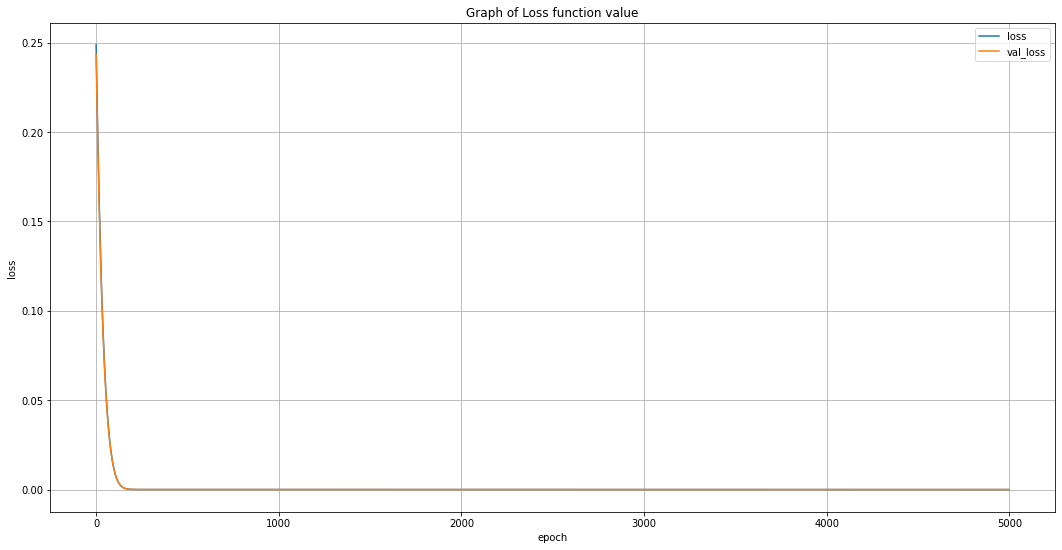

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 9))
plt.title("Graph of Loss function value")
plt.plot(学習推移_df['loss'], label='loss')
plt.plot(学習推移_df['val_loss'], label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 評価

In [19]:
X, y = TimeseriesGenerator(X_test, y_test.values, length=系列長の長さ, batch_size=10000)[0]

In [21]:
pd.Series(
    estimator.evaluate(X, y),
    index=estimator.metrics_names,
    name='評価指標'
)

313/313 [==============================] - 3s 9ms/step - loss: 4.7385e-04 - mse: 4.7385e-04


loss    0.000474
mse     0.000474
Name: 評価指標, dtype: float64

# 予測

In [22]:
y_pred = estimator.predict(X.reshape(-1, 系列長の長さ, 特徴量の数))

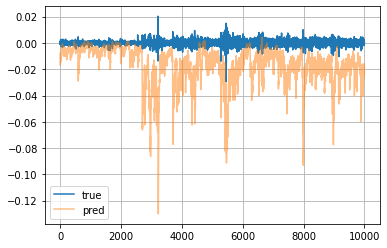

In [23]:
plt.plot(y, label='true')
plt.plot(y_pred, label='pred', alpha=0.5)
plt.grid()
plt.legend()
plt.show()